# <b>CV0003: Introduction to Data Science and Artificial Intelligence Mini Project</b>

<b> Group Member:</b>
1.  ()
2.  ()
3.  ()
4.  ()
5.  ()
---

## <b>A. Problem Introduction</b>

- **Title:**    
Smart Parking Availability Prediction System

- **Objective:** 
  1. Develop machine learning models to forecast the parking availability
  2. Enable data-driven parking recommendations for drivers   
  3. Identify peak hours and underutilized parking facilities 
  
- **Motivation:** 
  1. Reduce time spent searching for parking spaces
  2. Minimize traffic congestion caused by circling for parking
  3. Optimize parking resource utilization across different time periods
  4. Provide actionable insights for urban planning and smart city initiatives

- **Research Questions:**
  1. What are the parking availability patterns across different times of day and days of week?
  2. Which carparks experience the highest demand and when?
  3. Can we accurately predict future parking availability using historical data?
  4. Which machine learning models perform best for parking prediction tasks?
  5. What factors most significantly influence parking availability?

## <b>B. Data Extraction</b>

### <u>**Data Source**</u>
This project utilizes the **DataMall API** provided by Singapore's Land Transport Authority (LTA) to extract real-time parking availability data. The API provides up-to-date information on carpark occupancy across Singapore.

### <u>**Data Collection Period**</u>
- Data collected from: October 27-31, 2025
- Location: Tampines area carparks

### <u>**Dataset Features**</u>
The extracted dataset contains the following key attributes:

| Feature | Description | Data Type |
|---------|-------------|-----------|
| `timestamp` | Time when data was extracted | datetime |
| `carpark_id` | Unique identifier for each carpark | string |
| `area` | Geographic area of the carpark | string |
| `development` | Name/description of the carpark location | string |
| `latitude` | GPS latitude coordinate | float |
| `longitude` | GPS longitude coordinate | float |
| `available_lots` | Number of available parking spaces | integer |
| `lot_type` | Type of parking lot (C/H/Y) | string |
| `agency` | Managing authority (HDB/LTA/URA) | string |

### </u>**Data Collection Method**</u>
Automated data collection script (`carpark_collector.py`) that:
- Queries the DataMall API at scheduled intervals
- Stores raw data in CSV format
- Maintains separate files per collection day for data integrity

## <b>C. Data Preparation</b>
This section covers data cleaning, transformation, and preprocessing steps to prepare the raw parking data for analysis and modeling. Key tasks include:
- **Data consolidation**: Combining multiple daily files into a unified dataset
- **Data quality assessment**: Checking for missing values, duplicates, and inconsistencies
- **Time series resampling**: Ensuring regular time intervals for temporal analysis
- **Data validation**: Verifying data integrity and removing irrelevant features


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os 

import warnings 
warnings.filterwarnings("ignore")

### **Step 1: Combine Multiple Data Files**
Consolidate daily parking data files from the raw directory into a single unified dataset.

In [2]:
# Combine the dataset into one dataframe
dir_path = r"src\raw"
result_folder = r"src\processed"

# Create an empty list to store dataframes
data_frames = []

# Loop through all the files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(dir_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        data_frames.append(df)  # Add the DataFrame to the list

# Concatenate all DataFrames
combined_df = pd.concat(data_frames, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
output_file = 'combined_file.csv'
os.makedirs(result_folder, exist_ok=True)
combined_df.to_csv(os.path.join(result_folder, output_file), index=False)

### **Step 2: Initial Data Exploration**
Load the combined dataset and perform initial inspection to understand its structure and contents.

In [3]:
final_df = pd.read_csv (r"src\processed\combined_file.csv")
final_df.sample(10) # random sample

,timestamp,carpark_id,area,development,latitude,longitude,available_lots,lot_type,agency
3320,2025-10-29 04:49:21,B70,NaN,BLK 201 BEDOK NORTH STREET 1,1.326290,103.927996,25,C,HDB
3898,2025-10-29 06:49:31,B7A,NaN,BLK 216/218 BEDOK NORTH STREET 1,1.327132,103.934037,0,C,HDB
550,2025-10-28 18:56:19,B9,NaN,BLK 402/403 BEDOK NORTH AVENUE 3,1.330173,103.933815,151,C,HDB
8230,2025-10-30 05:55:41,T1,NaN,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,187,C,HDB
10025,2025-10-30 12:16:49,B34,NaN,BLK 134/136 BEDOK NORTH AVENUE 3,1.328312,103.935673,217,C,HDB
1990,2025-10-29 00:18:17,T1,NaN,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,175,C,HDB
6397,2025-10-29 17:36:01,B89,NaN,BLK 116A BEDOK NORTH ROAD,1.330959,103.937265,177,C,HDB
7186,2025-10-30 02:05:02,B26,NaN,BLK 98/100 BEDOK NORTH AVENUE 4,1.334308,103.940341,76,C,HDB
8935,2025-10-30 08:26:11,B69,NaN,BLK 94A BEDOK NORTH AVENUE 4,1.333426,103.941971,170,C,HDB
11148,2025-10-31 10:56:59,B86,NaN,BLK 114A BEDOK NORTH STREET 2,1.330767,103.935691,85,C,HDB


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11584 entries, 0 to 11583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       11584 non-null  object 
 1   carpark_id      11584 non-null  object 
 2   area            246 non-null    object 
 3   development     11584 non-null  object 
 4   latitude        11584 non-null  float64
 5   longitude       11584 non-null  float64
 6   available_lots  11584 non-null  int64  
 7   lot_type        11584 non-null  object 
 8   agency          11584 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 814.6+ KB


### **Step 3: Feature Relevance Assessment**
Analyze the `area` column to determine if it provides useful information for our analysis.

In [5]:
# Analyze unique for area column
area_unique = final_df['area'].unique()
area_unique

array(['Others', nan], dtype=object)

**Finding:** The `area` column contains only a single unique value across all records, providing no discriminative power for our analysis. 

**Action:** Remove this redundant column to simplify the dataset and reduce dimensionality.

In [6]:
final_df.drop (columns=['area'], inplace=True)

In [7]:
final_df

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
0,2025-10-27 16:27:27,63,Tampines Mall,1.352524,103.944700,384,C,LTA
1,2025-10-27 16:27:27,P0109,PASIR RIS PARK CAR PARK E OFF STREET,1.384596,103.943893,0,C,URA
2,2025-10-27 16:27:27,P0109,PASIR RIS PARK CAR PARK E OFF STREET,1.384596,103.943893,6,Y,URA
3,2025-10-27 16:27:27,T1,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,261,C,HDB
4,2025-10-27 16:27:27,T3,BLK 109/114 TAMPINES STREET 11,1.346641,103.947442,178,C,HDB
...,...,...,...,...,...,...,...,...
11579,2025-10-31 13:57:53,B85,BLK 184 BEDOK NORTH ROAD,1.326080,103.941358,458,C,HDB
11580,2025-10-31 13:57:53,B86,BLK 114A BEDOK NORTH STREET 2,1.330767,103.935691,112,C,HDB
11581,2025-10-31 13:57:53,B89,BLK 116A BEDOK NORTH ROAD,1.330959,103.937265,141,C,HDB
11582,2025-10-31 13:57:53,B8B,BLK 222 BEDOK NORTH DRIVE,1.324792,103.927947,142,C,HDB


### **Step 4: Timestamp Conversion**
Convert the timestamp column from string format to proper datetime objects to enable time-based analysis and operations.

In [8]:
final_df["timestamp"] = pd.to_datetime(final_df["timestamp"], format="%Y-%m-%d %H:%M:%S")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11584 entries, 0 to 11583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       11584 non-null  datetime64[ns]
 1   carpark_id      11584 non-null  object        
 2   development     11584 non-null  object        
 3   latitude        11584 non-null  float64       
 4   longitude       11584 non-null  float64       
 5   available_lots  11584 non-null  int64         
 6   lot_type        11584 non-null  object        
 7   agency          11584 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 724.1+ KB


In [9]:
final_df.sample (20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
9649,2025-10-30 10:56:39,B46,BLK 537 BEDOK NORTH STREET 3,1.331321,103.924182,36,C,HDB
7130,2025-10-30 01:55:01,T8,BLK 137/139 TAMPINES STREET 11,1.346414,103.944190,159,C,HDB
851,2025-10-28 19:56:37,B26,BLK 98/100 BEDOK NORTH AVENUE 4,1.334308,103.940341,130,C,HDB
73,2025-10-28 16:13:40,T8,BLK 137/139 TAMPINES STREET 11,1.346414,103.944190,132,C,HDB
8299,2025-10-30 06:05:41,B40,BLK 504/508 BEDOK NORTH STREET 3,1.332550,103.932770,285,C,HDB
7059,2025-10-30 01:23:45,B48,BLK 543/547 BEDOK NORTH STREET 3,1.330096,103.923421,83,C,HDB
240,2025-10-28 16:43:44,B46,BLK 537 BEDOK NORTH STREET 3,1.331321,103.924182,61,C,HDB
6624,2025-10-29 23:22:32,B45,BLK 537/539 BEDOK NORTH STREET 3,1.331680,103.925429,31,C,HDB
8516,2025-10-30 06:55:43,B8,BLK 201/203 BEDOK NORTH STREET 1,1.325881,103.928276,69,C,HDB
11513,2025-10-31 13:47:52,B34,BLK 134/136 BEDOK NORTH AVENUE 3,1.328312,103.935673,221,C,HDB


### **Step 5: Time Series Regularity Check**
Examine whether data points are collected at consistent time intervals. Irregular intervals can complicate time series analysis and forecasting.

In [10]:
final_df[final_df["development"] == "Tampines Mall"].tail (20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
10624,2025-10-31 00:36:33,63,Tampines Mall,1.352524,103.9447,635,C,LTA
10672,2025-10-31 00:46:34,63,Tampines Mall,1.352524,103.9447,636,C,LTA
10720,2025-10-31 00:56:43,63,Tampines Mall,1.352524,103.9447,636,C,LTA
10768,2025-10-31 09:46:49,63,Tampines Mall,1.352524,103.9447,575,C,LTA
10816,2025-10-31 09:56:50,63,Tampines Mall,1.352524,103.9447,568,C,LTA
10864,2025-10-31 10:06:51,63,Tampines Mall,1.352524,103.9447,554,C,LTA
10912,2025-10-31 10:16:53,63,Tampines Mall,1.352524,103.9447,530,C,LTA
10960,2025-10-31 10:26:54,63,Tampines Mall,1.352524,103.9447,516,C,LTA
11008,2025-10-31 10:36:56,63,Tampines Mall,1.352524,103.9447,498,C,LTA
11056,2025-10-31 10:46:58,63,Tampines Mall,1.352524,103.9447,472,C,LTA


**Finding:** The timestamps show irregular intervals between consecutive data points, which is problematic for time series modeling.

**Impact:** 
- Machine learning models (especially LSTM) require regular time intervals
- Inconsistent sampling can introduce bias and reduce prediction accuracy
- Aggregation and trend analysis become unreliable

**Solution:** Implement time series resampling to create uniform 10-minute intervals with interpolation.

In [11]:
print (f"Car Park: {final_df["carpark_id"].nunique()}")
print (f"Unique timestamp: {final_df["timestamp"].nunique()}")

Car Park: 47
Unique timestamp: 248


### **Step 6: Dataset Dimensions**
Count unique carparks and timestamps to understand the scope of our data.

In [12]:
unique_carparks = final_df[['carpark_id', 'lot_type']].drop_duplicates()
print(f"Found {len(unique_carparks)} car park-lot type combinations")

Found 48 car park-lot type combinations


### **Step 7: Time Series Resampling Process**

**Purpose:** Transform irregular time series data into regular 10-minute intervals for consistent modeling.

**Methodology:**
1. **Separate processing**: Handle each carpark-lot_type combination independently
2. **Time grid creation**: Generate uniform 10-minute intervals within monitoring period
3. **Linear interpolation**: Estimate missing values between known data points
4. **Data aggregation**: Use mean for overlapping timestamps
5. **Metadata preservation**: Maintain static attributes (location, agency, etc.)

**Benefits:**
- Enables LSTM and other time series models that require regular intervals
- Improves data quality and consistency
- Facilitates accurate temporal pattern analysis
- Reduces noise from irregular sampling

In [13]:
resampled_dfs = []
    
for idx, row in unique_carparks.iterrows():
    carpark_id = row['carpark_id']
    lot_type = row['lot_type']
    
    # Filter data for this specific car park and lot type
    carpark_data = final_df[
        (final_df['carpark_id'] == carpark_id) & 
        (final_df['lot_type'] == lot_type)
    ].copy().sort_values('timestamp')
    
    # Get the first and last timestamp for this car park
    # This ensures we only create intervals within the monitoring period
    first_timestamp = carpark_data['timestamp'].iloc[0]
    last_timestamp = carpark_data['timestamp'].iloc[-1]
    
    # Create 10-minute time grid only for this car park's monitoring period
    # Floor the start and ceil the end to nearest 10 minutes
    time_grid_start = first_timestamp.floor('10min')
    time_grid_end = last_timestamp.ceil('10min')
    
    # Set timestamp as index for resampling
    carpark_data = carpark_data.set_index('timestamp')
    
    # Resample to 10-minute intervals
    # This creates a regular time grid and aligns existing data to it
    resampled = carpark_data.resample('10min').mean(numeric_only=True)
    
    # Interpolate the available_lots using linear interpolation
    # This estimates values between known data points
    # Example: 100 lots at 2:00, 80 lots at 2:20 → ~90 lots at 2:10
    resampled['available_lots'] = resampled['available_lots'].interpolate(
        method='linear'
    )
    
    # Round to nearest integer (can't have fractional parking spaces)
    resampled['available_lots'] = resampled['available_lots'].round().astype(int)
    
    # Reset index to get timestamp back as a column
    resampled = resampled.reset_index()
    
    # Add back the static columns that don't change over time
    resampled['carpark_id'] = carpark_id
    resampled['lot_type'] = lot_type
    resampled['development'] = carpark_data['development'].iloc[0]
    resampled['agency'] = carpark_data['agency'].iloc[0]
    resampled['latitude'] = carpark_data['latitude'].iloc[0]
    resampled['longitude'] = carpark_data['longitude'].iloc[0]
    
    # Add to the list of resampled dataframes
    resampled_dfs.append(resampled)

In [14]:
resampled_df = pd.concat(resampled_dfs, ignore_index=True)
    
# Sort by timestamp, then car park ID
resampled_df = resampled_df.sort_values(['timestamp', 'carpark_id', 'lot_type'])

# Reorder columns to match original structure
resampled_df = resampled_df[[
    'timestamp', 'carpark_id', 'development', 'latitude', 
    'longitude', 'available_lots', 'lot_type', 'agency'
]]

In [15]:
resampled_df[resampled_df["development"] == "Tampines Mall"].head(20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
0,2025-10-27 16:20:00,63,Tampines Mall,1.352524,103.9447,384,C,LTA
1,2025-10-27 16:30:00,63,Tampines Mall,1.352524,103.9447,394,C,LTA
2,2025-10-27 16:40:00,63,Tampines Mall,1.352524,103.9447,381,C,LTA
3,2025-10-27 16:50:00,63,Tampines Mall,1.352524,103.9447,369,C,LTA
4,2025-10-27 17:00:00,63,Tampines Mall,1.352524,103.9447,369,C,LTA
5,2025-10-27 17:10:00,63,Tampines Mall,1.352524,103.9447,370,C,LTA
6,2025-10-27 17:20:00,63,Tampines Mall,1.352524,103.9447,370,C,LTA
7,2025-10-27 17:30:00,63,Tampines Mall,1.352524,103.9447,370,C,LTA
8,2025-10-27 17:40:00,63,Tampines Mall,1.352524,103.9447,371,C,LTA
9,2025-10-27 17:50:00,63,Tampines Mall,1.352524,103.9447,371,C,LTA


### **Data Preparation Complete**

The dataset has been successfully cleaned and resampled with:
- **Regular 10-minute intervals** across all carparks
- **Linear interpolation** filling gaps between observations
- **Consistent temporal structure** ready for time series analysis
- **Preserved metadata** including location and agency information

The resampled dataset is now ready for exploratory data analysis and machine learning modeling.

## <b>D. Exploratory Data Analysis (EDA)</b>
This section presents comprehensive statistical and visual analysis of parking availability patterns. The EDA is organized into multiple phases:

**Phase 1: Aggregate Analysis**
- Statistical summaries across all carparks
- Identification of busiest and underutilized facilities
- Volatility and capacity utilization metrics

**Phase 2: Temporal Patterns**
- Hour-of-day availability patterns
- Day-of-week trends
- Peak hour identification

**Phase 3: Spatial Analysis**
- Geographic distribution of carparks
- Location-based availability patterns
- Agency comparison

**Objectives:**
1. Understand parking demand patterns across time and space
2. Identify high-demand periods requiring intervention
3. Discover underutilized resources
4. Generate insights for model feature selection

### **Phase 1: Aggregate Statistical Analysis**

This phase computes comprehensive statistics for each carpark to understand:
- **Capacity utilization**: How full are carparks on average?
- **Demand volatility**: How much does availability fluctuate?
- **Peak periods**: When is demand highest?
- **Trend direction**: Is availability increasing or decreasing over time?

#### **1.1 Carpark-Level Statistics Computation**

Calculate key metrics for each carpark:
- **Descriptive statistics**: Mean, median, standard deviation, min/max availability
- **Capacity estimation**: Maximum observed availability for total capacity
- **Occupancy metrics**: Average occupancy rate and time spent at full capacity
- **Volatility measures**: Coefficient of variation to assess demand stability
- **Peak hour analysis**: Identify busiest hour for each carpark

In [16]:
stats_list = []

for carpark_id in resampled_df["carpark_id"].unique():
    metadata = resampled_df[resampled_df["carpark_id"] == carpark_id]

    # Basic statistics
    mean_avail = metadata["available_lots"].mean()
    median_avail = metadata["available_lots"].median()
    std_avail = metadata["available_lots"].std()
    max_avail = metadata["available_lots"].max()
    min_avail = metadata["available_lots"].min()

    # Capacity estimation (assume)
    capacity_est = max_avail

    # Utilization metrics
    percentage_full = (metadata["available_lots"] == 0).sum() / len(metadata) * 100
    average_occupancy_rate = (1 - mean_avail / capacity_est) * 100 if capacity_est > 0 else 0
    average_occupancy = (average_occupancy_rate / 100) * capacity_est

    # Volatility measure
    coefficient_of_variation = (std_avail / mean_avail) * 100 if mean_avail > 0 else 0

    # Peak hour analysis
    metadata['hour'] = metadata['timestamp'].dt.hour
    hourly_average = metadata.groupby('hour')['available_lots'].mean()
    peak_hour = hourly_average.idxmin()
    peak_hour_avg_avail = hourly_average.min()

    # Trend anlysis (positive = getting emptier, negative = getting fuller)
    metadata_sorted = metadata.sort_values('timestamp').reset_index(drop=True)
    if len (metadata_sorted) > 1:
        x = np.arange(len(metadata_sorted))
        y = metadata_sorted['available_lots'].values
        trend_slope = np.polyfit(x, y, 1)[0]
    else:
        trend_slope = 0
    
    # Get other attributes
    development = metadata['development'].iloc[0]
    agency = metadata['agency'].iloc[0]
    latitude = metadata['latitude'].iloc[0]
    longitude = metadata['longitude'].iloc[0]
    num_records = len(metadata)


    stats_list.append({
        'carpark_id': carpark_id,
        'development': development,
        'agency': agency,
        'latitude': latitude,
        'longitude': longitude,
        'mean_available_lots': mean_avail,
        'median_available_lots': median_avail,
        'std_available_lots': std_avail,
        'max_available_lots': max_avail,
        'min_available_lots': min_avail,
        'capacity_estimation': capacity_est,
        'percentage_time_full': percentage_full,
        'average_occupancy': average_occupancy,
        'average_occupancy_rate (%)': average_occupancy_rate,
        'coefficient_of_variation (%)': coefficient_of_variation,
        'peak_hour': peak_hour,
        'peak_hour_avg_available_lots': peak_hour_avg_avail,
        'trend_slope': trend_slope
    })

In [17]:
# Create DataFrame
stats_df = pd.DataFrame(stats_list)
stats_df.sort_values("average_occupancy", ascending=False, inplace=True)
stats_df.head(10)

,carpark_id,development,agency,latitude,longitude,mean_available_lots,median_available_lots,std_available_lots,max_available_lots,min_available_lots,capacity_estimation,percentage_time_full,average_occupancy,average_occupancy_rate (%),coefficient_of_variation (%),peak_hour,peak_hour_avg_available_lots,trend_slope
23,B40,BLK 504/508 BEDOK NORTH STREET 3,HDB,1.332550,103.932770,253.281623,303.0,160.777706,519,0,519,17.183771,265.718377,51.198146,63.477841,1,188.500000,0.918758
38,B79,BLK 772A BEDOK RESERVOIR VIEW,HDB,1.336776,103.937407,1121.307876,1131.0,180.933248,1373,767,1373,0.000000,251.692124,18.331546,16.135912,1,874.722222,0.478227
27,B44,BLK 528/536 BEDOK NORTH STREET 3,HDB,1.333971,103.927509,591.847255,598.0,129.783130,774,398,774,0.000000,182.152745,23.533946,21.928484,1,424.611111,0.238954
0,63,Tampines Mall,LTA,1.352524,103.944700,475.106762,419.0,127.503910,636,154,636,0.000000,160.893238,25.297679,26.836897,13,289.833333,0.235880
9,B11,BLK 416/418 BEDOK NORTH AVENUE 2,HDB,1.328342,103.930396,576.284010,583.0,86.865309,697,442,697,0.000000,120.715990,17.319367,15.073350,0,465.000000,0.173682
13,B25,BLK 91/97 BEDOK NORTH AVENUE 4,HDB,1.332969,103.940490,23.140811,17.0,26.456459,130,0,130,31.264916,106.859189,82.199376,114.328140,0,0.000000,0.027254
7,T9,BLK 140/148 TAMPINES STREET 12,HDB,1.347816,103.943647,295.238434,327.0,63.855313,391,182,391,0.000000,95.761566,24.491449,21.628388,1,229.416667,-0.062313
11,B21,BLK 74/82 BEDOK NORTH ROAD,HDB,1.328178,103.941046,317.844869,322.0,70.221061,412,211,412,0.000000,94.155131,22.853187,22.092872,1,224.555556,0.090122
8,B10,BLK 404/413 BEDOK NORTH AVENUE 3,HDB,1.329028,103.933708,265.618138,270.0,53.279324,353,186,353,0.000000,87.381862,24.754068,20.058617,0,200.888889,0.092226
33,B59,BLK 716/718/721 BEDOK RESERVOIR ROAD,HDB,1.337509,103.925961,211.470167,218.0,49.563076,284,133,284,0.000000,72.529833,25.538674,23.437384,1,144.833333,0.068526


In [18]:
# Display top 10 busiest car parks
print(f"\na. TOP 10 BUSIEST CAR PARKS (Highest Occupancy):")
print(stats_df[['carpark_id', 'development', 'agency', 'average_occupancy_rate (%)', 'capacity_estimation', "average_occupancy"]].head(10).to_string(index=False))

# Display top 10 most underutilized
print(f"\nb. TOP 10 MOST UNDERUTILIZED CAR PARKS (Lowest Occupancy):")
print(stats_df[['carpark_id', 'development', 'agency', 'average_occupancy_rate (%)', 'capacity_estimation', "average_occupancy"]].tail(10).to_string(index=False))

# Display top 10 most volatile
print(f"\nc. TOP 10 MOST VOLATILE CAR PARKS:")
top_volatile = stats_df.nlargest(10, 'std_available_lots')
print(top_volatile[['carpark_id', 'development', 'agency', 'std_available_lots', 'mean_available_lots']].to_string(index=False))

# Display car parks that are frequently full
print(f"\nd. CAR PARKS FREQUENTLY AT FULL CAPACITY (>10% of time):")
frequently_full = stats_df[stats_df['percentage_time_full'] > 10].sort_values('percentage_time_full', ascending=False)
if len(frequently_full) > 0:
    print(frequently_full[['carpark_id', 'development', 'agency', 'percentage_time_full', 'capacity_estimation']].to_string(index=False))
else:
    print("   None found - all car parks have good availability!")



a. TOP 10 BUSIEST CAR PARKS (Highest Occupancy):
carpark_id                          development agency  average_occupancy_rate (%)  capacity_estimation  average_occupancy
       B40     BLK 504/508 BEDOK NORTH STREET 3    HDB                   51.198146                  519         265.718377
       B79        BLK 772A BEDOK RESERVOIR VIEW    HDB                   18.331546                 1373         251.692124
       B44     BLK 528/536 BEDOK NORTH STREET 3    HDB                   23.533946                  774         182.152745
        63                        Tampines Mall    LTA                   25.297679                  636         160.893238
       B11     BLK 416/418 BEDOK NORTH AVENUE 2    HDB                   17.319367                  697         120.715990
       B25       BLK 91/97 BEDOK NORTH AVENUE 4    HDB                   82.199376                  130         106.859189
        T9       BLK 140/148 TAMPINES STREET 12    HDB                   24.491449       

#### **1.2 Occupancy vs Volatility Visualization**

**Purpose:** Classify carparks into four quadrants based on their occupancy rate and demand volatility.

**Quadrant Interpretation:**
- **High Occupancy, High Volatility**: Busy and unpredictable - difficult to find parking
- **High Occupancy, Low Volatility**: Consistently busy - reliably full
- **Low Occupancy, High Volatility**: Underutilized but variable - unreliable availability
- **Low Occupancy, Low Volatility**: Consistently available - good parking options

**Visual Elements:**
- Bubble size represents carpark capacity
- Colors distinguish managing agencies (HDB/LTA/URA)
- Quadrant lines show median values
- Key carparks are labeled for identification

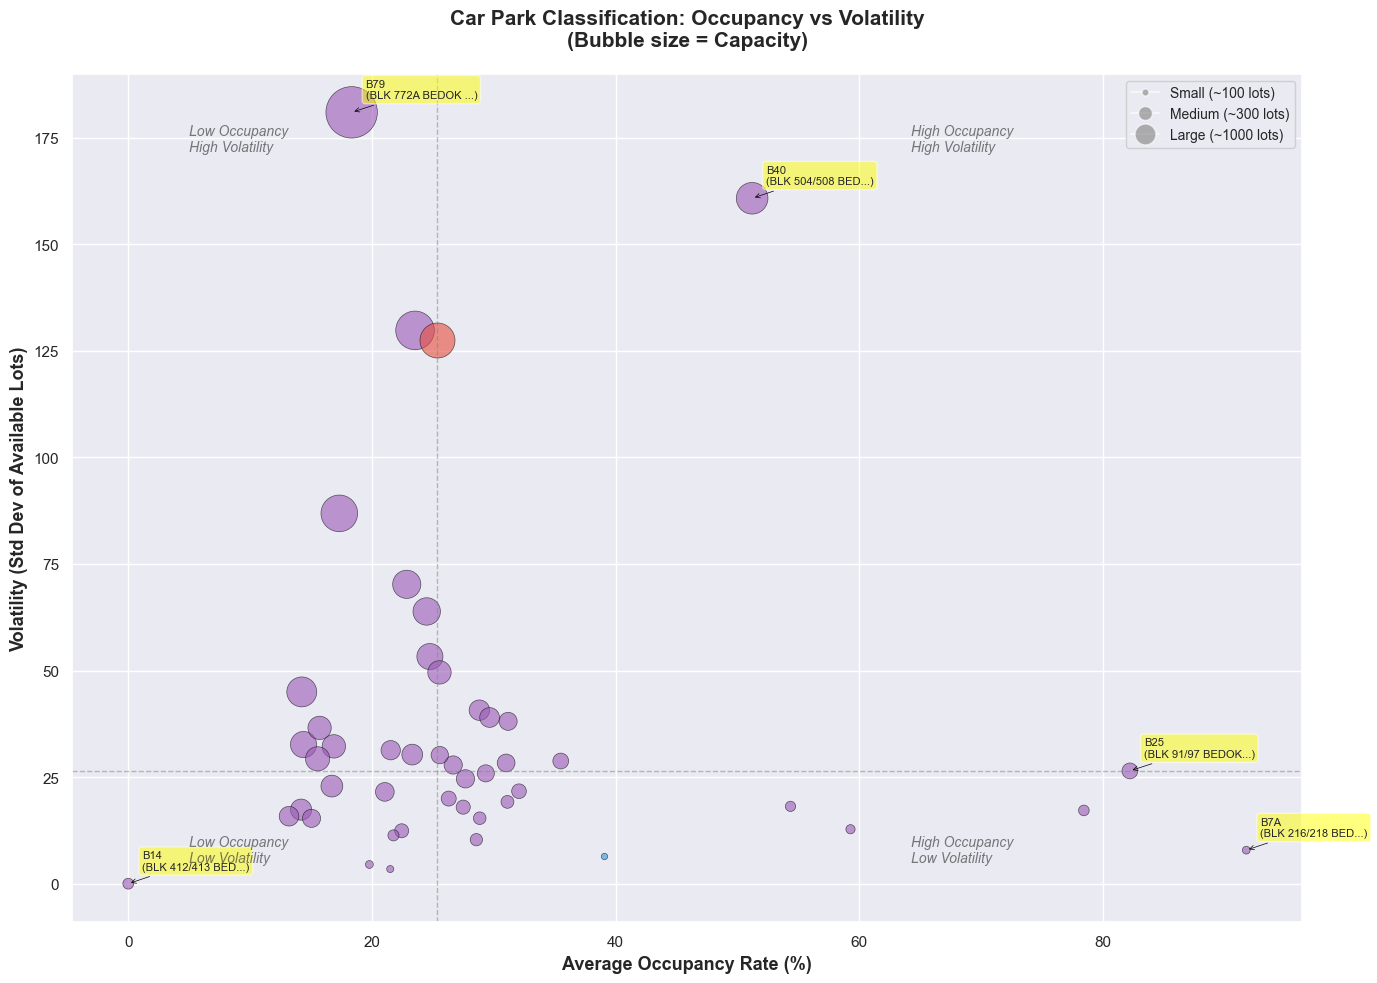

In [19]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Color mapping for agencies
agency_colors = {
    'HDB': '#9B59B6',  # Purple
    'LTA': '#E74C3C',  # Red
    'URA': '#3498DB'   # Blue
}

# Plot each agency separately for legend
for agency in stats_df['agency'].unique():
    agency_data = stats_df[stats_df['agency'] == agency]
    
    ax.scatter(
        agency_data['average_occupancy_rate (%)'],
        agency_data['std_available_lots'],
        s=agency_data['capacity_estimation'],  # Size by capacity
        alpha=0.6,
        c=agency_colors.get(agency, '#95A5A6'),
        label=f'{agency} ({len(agency_data)} car parks)',
        edgecolors='black',
        linewidth=0.5
    )

# Add labels for interesting points
# Label the 5 most extreme points
extreme_points = pd.concat([
    stats_df.nlargest(2, 'std_available_lots'),  # Most volatile
    stats_df.nlargest(2, 'average_occupancy_rate (%)'),  # Busiest
    stats_df.nsmallest(1, 'average_occupancy_rate (%)')  # Least busy
])

for _, row in extreme_points.iterrows():
    ax.annotate(
        f"{row['carpark_id']}\n({row['development'][:15]}...)",
        xy=(row['average_occupancy_rate (%)'], row['std_available_lots']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black', lw=0.5)
    )

# Add quadrant lines
median_occ = stats_df['average_occupancy_rate (%)'].median()
median_vol = stats_df['std_available_lots'].median()

ax.axvline(median_occ, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(median_vol, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Add quadrant labels
ax.text(5, stats_df['std_available_lots'].max() * 0.95, 'Low Occupancy\nHigh Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(stats_df['average_occupancy_rate (%)'].max() * 0.7, stats_df['std_available_lots'].max() * 0.95, 
        'High Occupancy\nHigh Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(5, 5, 'Low Occupancy\nLow Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(stats_df['average_occupancy_rate (%)'].max() * 0.7, 5, 'High Occupancy\nLow Volatility',
        fontsize=10, alpha=0.6, style='italic')

# Labels and title
ax.set_xlabel('Average Occupancy Rate (%)', fontsize=13, fontweight='bold')
ax.set_ylabel('Volatility (Std Dev of Available Lots)', fontsize=13, fontweight='bold')
ax.set_title('Car Park Classification: Occupancy vs Volatility\n(Bubble size = Capacity)', 
             fontsize=15, fontweight='bold', pad=20)

# Legend
legend = ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
legend.set_title('Agency', prop={'size': 12, 'weight': 'bold'})

# Add size legend
from matplotlib.lines import Line2D
size_legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Small (~100 lots)',
           markerfacecolor='gray', markersize=5, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Medium (~300 lots)',
           markerfacecolor='gray', markersize=10, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Large (~1000 lots)',
           markerfacecolor='gray', markersize=15, alpha=0.6),
]
ax.legend(handles=legend.get_patches() + size_legend_elements, 
          loc='upper right', fontsize=10, framealpha=0.9)

# Grid
ax.grid(True, alpha=1)

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Print insights
print(f"\na. KEY INSIGHTS:")
print(f"• Median occupancy: {median_occ:.2f}%")
print(f"• Median volatility: {median_vol:.2f} lots")

# Identify quadrants
high_occ_high_vol = stats_df[(stats_df['average_occupancy_rate (%)'] > median_occ) & (stats_df['std_available_lots'] > median_vol)]
high_occ_low_vol = stats_df[(stats_df['average_occupancy_rate (%)'] > median_occ) & (stats_df['std_available_lots'] <= median_vol)]
low_occ_high_vol = stats_df[(stats_df['average_occupancy_rate (%)'] <= median_occ) & (stats_df['std_available_lots'] > median_vol)]
low_occ_low_vol = stats_df[(stats_df['average_occupancy_rate (%)'] <= median_occ) & (stats_df['std_available_lots'] <= median_vol)]

print(f"\nb. QUADRANT DISTRIBUTION:")
print(f"• High Occupancy, High Volatility: {len(high_occ_high_vol)} car parks (Busy & Unpredictable)")
print(f"• High Occupancy, Low Volatility: {len(high_occ_low_vol)} car parks (Busy & Stable)")
print(f"• Low Occupancy, High Volatility: {len(low_occ_high_vol)} car parks (Underutilized & Variable)")
print(f"• Low Occupancy, Low Volatility: {len(low_occ_low_vol)} car parks (Underutilized & Stable)")

print(f"\nc. INTERPRETATION:")
print(f"• High Volatility car parks are harder to predict")
print(f"• High Occupancy car parks may need capacity expansion")
print(f"• Low Occupancy car parks might be oversized or poorly located")
print(f"• Bubble size shows capacity - larger = more spaces")



a. KEY INSIGHTS:
• Median occupancy: 25.30%
• Median volatility: 26.46 lots

b. QUADRANT DISTRIBUTION:
• High Occupancy, High Volatility: 9 car parks (Busy & Unpredictable)
• High Occupancy, Low Volatility: 14 car parks (Busy & Stable)
• Low Occupancy, High Volatility: 14 car parks (Underutilized & Variable)
• Low Occupancy, Low Volatility: 10 car parks (Underutilized & Stable)

c. INTERPRETATION:
• High Volatility car parks are harder to predict
• High Occupancy car parks may need capacity expansion
• Low Occupancy car parks might be oversized or poorly located
• Bubble size shows capacity - larger = more spaces


#### **1.3 Temporal Pattern Analysis - Heatmaps**

**Purpose:** Visualize how parking availability changes throughout the day for each carpark.

**Methodology:**
- **Hierarchical clustering**: Group carparks with similar daily patterns
- **Dual visualization**:   
  a. Absolute values (actual available lots)   
  b. Normalized values (relative to each carpark's capacity)

**Insights to Extract:**
- Morning peak (7-10am): Workplace/commercial demand
- Afternoon peak (11-3pm): Shopping/dining demand  
- Evening peak (4-8pm): Residential/entertainment demand
- Night stability (9pm-6am): Overnight parking patterns

**Benefits:**
- Identify carparks with similar usage patterns
- Understand demand by time of day
- Inform targeted parking recommendations

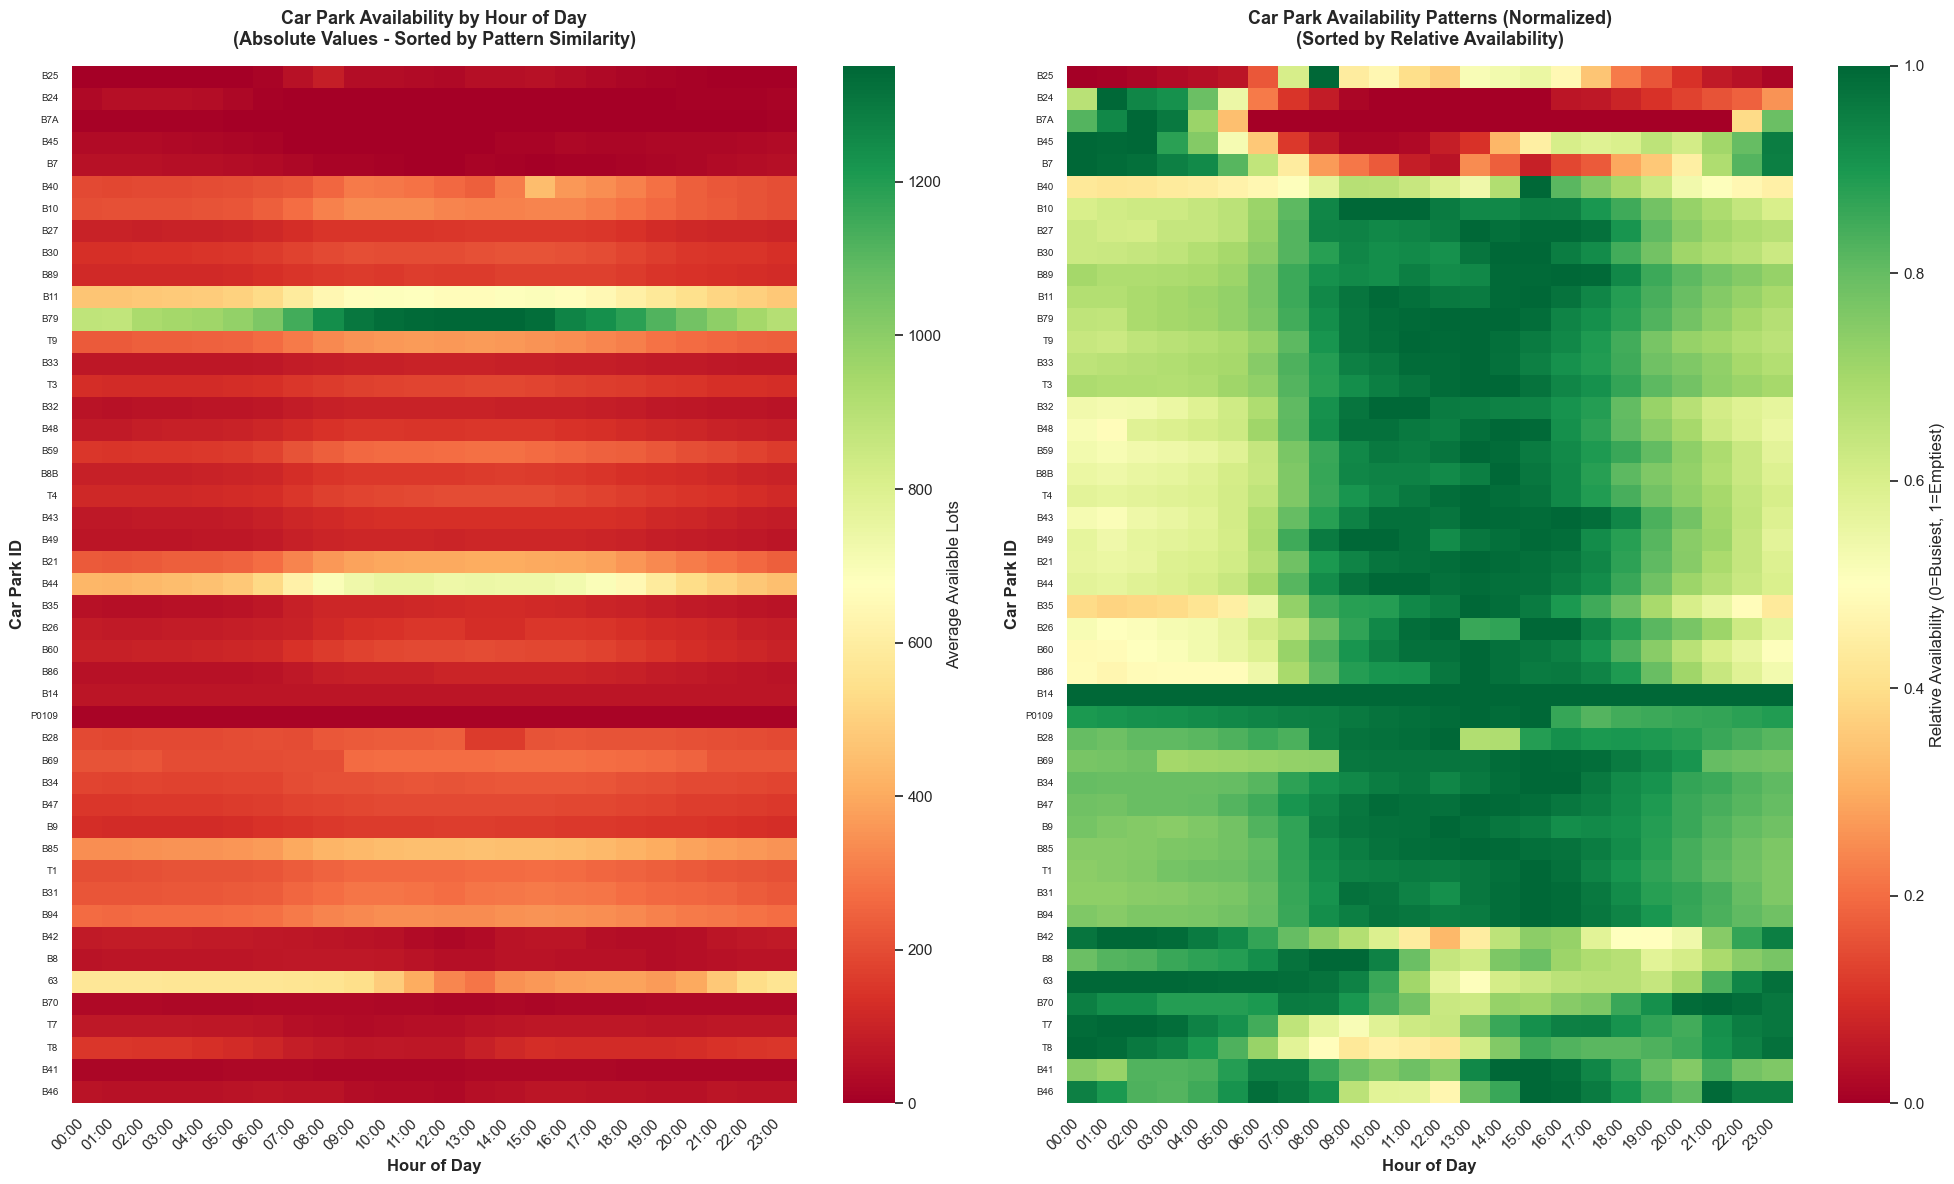

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

temp_df = resampled_df.copy()
temp_df["hour"] = temp_df["timestamp"].dt.hour

hourly_average = temp_df.pivot_table(
    values='available_lots',
    index='carpark_id',
    columns='hour',
    aggfunc='mean'
)

# Normalize by row (each car park's pattern relative to its own range)
# This helps compare patterns regardless of capacity
hourly_normalized = hourly_average.div(hourly_average.max(axis=1), axis=0)

# Perform hierarchical clustering to sort car parks by similarity
linkage_matrix = linkage(hourly_normalized.fillna(0), method='ward')

dendro = dendrogram(linkage_matrix, no_plot=True)
order = dendro['leaves']

# Reorder the dataframe
hourly_sorted = hourly_average.iloc[order]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

sns.heatmap(
    hourly_sorted,
    cmap='RdYlGn',
    ax=ax1,
    cbar_kws={'label': 'Average Available Lots'},
    linewidths=0,
    yticklabels=True,
    xticklabels=True
)

ax1.set_title('Car Park Availability by Hour of Day\n(Absolute Values - Sorted by Pattern Similarity)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax1.set_ylabel('Car Park ID', fontsize=12, fontweight='bold')

# Make x-axis labels more readable
ax1.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=7)

hourly_normalized_sorted = hourly_normalized.iloc[order]

sns.heatmap(
    hourly_normalized_sorted,
    cmap='RdYlGn',
    ax=ax2,
    cbar_kws={'label': 'Relative Availability (0=Busiest, 1=Emptiest)'},
    linewidths=0,
    yticklabels=True,
    xticklabels=True,
    vmin=0,
    vmax=1
)

ax2.set_title('Car Park Availability Patterns (Normalized)\n(Sorted by Relative Availability)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Car Park ID', fontsize=12, fontweight='bold')

ax2.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=7)

# Add annotations for pattern types
# Identify peak hours for each car park
peak_hours = hourly_normalized_sorted.idxmin(axis=1)  # Hour with lowest availability (busiest)

morning_peak = (peak_hours >= 7) & (peak_hours <= 10)
afternoon_peak = (peak_hours >= 11) & (peak_hours <= 15)
evening_peak = (peak_hours >= 16) & (peak_hours <= 20)
night_stable = (peak_hours >= 21) | (peak_hours <= 6)

plt.tight_layout()

In [22]:
print(f"\na. PEAK HOUR DISTRIBUTION:")
print(f"Morning peak (7-10am): {morning_peak.sum()} car parks")
print(f"Afternoon peak (11-3pm): {afternoon_peak.sum()} car parks")
print(f"Evening peak (4-8pm): {evening_peak.sum()} car parks")
print(f"Night/stable (9pm-6am): {night_stable.sum()} car parks")


a. PEAK HOUR DISTRIBUTION:
Morning peak (7-10am): 3 car parks
Afternoon peak (11-3pm): 7 car parks
Evening peak (4-8pm): 2 car parks
Night/stable (9pm-6am): 35 car parks


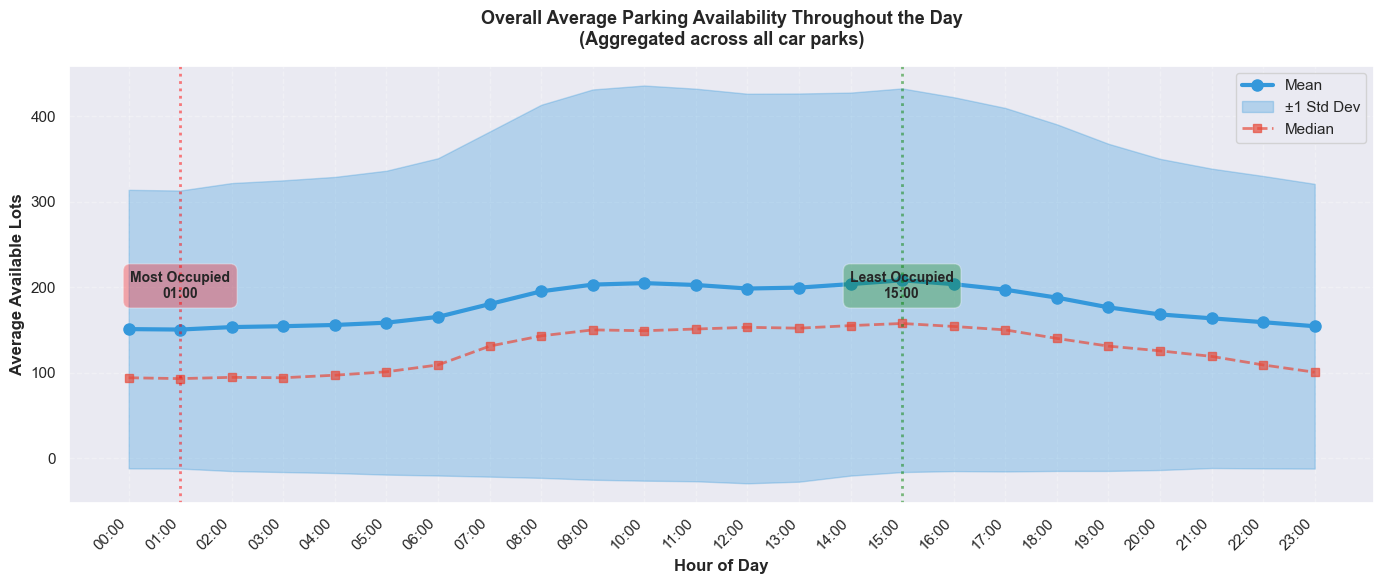

In [23]:
fig2, ax3 = plt.subplots(figsize=(14, 6))

# Calculate overall average by hour (across all car parks)
overall_hourly = temp_df.groupby('hour')['available_lots'].agg(['mean', 'std', 'median'])

# Plot
ax3.plot(overall_hourly.index, overall_hourly['mean'], 
         linewidth=3, marker='o', markersize=8, label='Mean', color='#3498DB')
ax3.fill_between(overall_hourly.index, 
                 overall_hourly['mean'] - overall_hourly['std'],
                 overall_hourly['mean'] + overall_hourly['std'],
                 alpha=0.3, color='#3498DB', label='±1 Std Dev')
ax3.plot(overall_hourly.index, overall_hourly['median'], 
         linewidth=2, linestyle='--', marker='s', markersize=6, 
         label='Median', color='#E74C3C', alpha=0.7)

# Styling
ax3.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax3.set_ylabel('Average Available Lots', fontsize=12, fontweight='bold')
ax3.set_title('Overall Average Parking Availability Throughout the Day\n(Aggregated across all car parks)', 
              fontsize=13, fontweight='bold', pad=15)
ax3.set_xticks(range(24))
ax3.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.legend(fontsize=11, loc='best')

# Highlight peak hours
# Ensure the hour values are converted to numeric (int/float) before passing to plotting functions
busiest_hour = overall_hourly['mean'].idxmin()
emptiest_hour = overall_hourly['mean'].idxmax()

# Convert to float for plotting (matplotlib expects numeric x positions)
busiest_hour_f = float(busiest_hour)
emptiest_hour_f = float(emptiest_hour)

ax3.axvline(busiest_hour_f, color='red', linestyle=':', alpha=0.5, linewidth=2)
ax3.axvline(emptiest_hour_f, color='green', linestyle=':', alpha=0.5, linewidth=2)

# Use int() for formatting in text labels, but pass floats for the x coordinate
ax3.text(busiest_hour_f, overall_hourly['mean'].max() * 0.9, 
         f'Most Occupied\n{int(busiest_hour):02d}:00', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.3))
ax3.text(emptiest_hour_f, overall_hourly['mean'].max() * 0.9, 
         f'Least Occupied\n{int(emptiest_hour):02d}:00', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='green', alpha=0.3))

plt.tight_layout()

In [24]:
print(f"\nOVERALL HOURLY INSIGHTS:")
print(f"    a. Busiest hour: {busiest_hour:02d}:00 (Avg: {overall_hourly.loc[busiest_hour, 'mean']:.0f} lots available)")
print(f"    b. Least busy hour: {emptiest_hour:02d}:00 (Avg: {overall_hourly.loc[emptiest_hour, 'mean']:.0f} lots available)")
print(f"    c. Difference: {overall_hourly.loc[emptiest_hour, 'mean'] - overall_hourly.loc[busiest_hour, 'mean']:.0f} lots")


OVERALL HOURLY INSIGHTS:
    a. Busiest hour: 01:00 (Avg: 150 lots available)
    b. Least busy hour: 15:00 (Avg: 208 lots available)
    c. Difference: 58 lots


#### **1.4 Geographic Distribution Map**

**Purpose:** Visualize parking availability patterns across physical locations using an interactive map.

**Map Features:**
- **Color-coded markers**: Indicate occupancy levels (green=low, orange=medium, red=high demand)
- **Clustering**: Group nearby carparks for better visualization at different zoom levels
- **Interactive popups**: Click markers to see detailed statistics
- **Legend**: Quick reference for occupancy rate categories

**Information Displayed:**
- Carpark identification and location name
- Capacity and occupancy metrics
- Peak hours and volatility
- Managing agency

**Use Cases:**
- Identify geographic hotspots of high demand
- Find alternative parking options nearby
- Compare agency performance by location
- Support urban planning decisions

In [25]:
import folium
from folium.plugins import MarkerCluster, HeatMap

# Validate coordinates
print(f"Longitude range: {stats_df['longitude'].min():.4f} to {stats_df['longitude'].max():.4f}")
print(f"Latitude range: {stats_df['latitude'].min():.4f} to {stats_df['latitude'].max():.4f}")

# Calculate map center
map_center = [stats_df['latitude'].mean(), stats_df['longitude'].mean()]

# Create base map
carpark_map = folium.Map(
    location=map_center, 
    zoom_start=12,
    tiles='OpenStreetMap'
)

# Add marker cluster
marker_cluster = MarkerCluster(name='Car Parks').add_to(carpark_map)

# Add markers
for idx, row in stats_df.iterrows():
    # Color coding based on occupancy
    if row['average_occupancy_rate (%)'] >= 30.2:
        color = 'red'
        status = 'High Demand'
    elif row['average_occupancy_rate (%)'] >= 25.85:
        color = 'orange'
        status = 'Upper-Medium Demand'
    elif row['average_occupancy_rate (%)'] >= 18.55:
        color = 'blue'
        status = 'Low-Medium Demand'
    else:
        color = 'green'
        status = 'Low Demand'
    
    popup_text = f"""
    <div style="font-family: Arial; width: 250px;">
        <h4 style="margin: 0 0 10px 0;">{row['development']}</h4>
        <table style="width: 100%; font-size: 12px;">
            <tr><td><b>Carpark ID:</b></td><td>{row['carpark_id']}</td></tr>
            <tr><td><b>Agency:</b></td><td>{row['agency']}</td></tr>
            <tr><td colspan="2"><hr style="margin: 5px 0;"></td></tr>
            <tr><td><b>Status:</b></td><td><span style="color: {color};">{status}</span></td></tr>
            <tr><td><b>Capacity:</b></td><td>{row['capacity_estimation']} lots</td></tr>
            <tr><td><b>Avg Occupied:</b></td><td>{row['average_occupancy']:.0f} lots</td></tr>
            <tr><td><b>Occupancy Rate:</b></td><td>{row['average_occupancy_rate (%)']:.1f}%</td></tr>
            <tr><td colspan="2"><hr style="margin: 5px 0;"></td></tr>
            <tr><td><b>Volatility:</b></td><td>{row['std_available_lots']:.1f}</td></tr>
            <tr><td><b>Peak Hour:</b></td><td>{row['peak_hour']:02d}:00</td></tr>
        </table>
    </div>
    """
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=f"{row['development']} - {row['average_occupancy_rate (%)']:.0f}%",
        icon=folium.Icon(color=color, icon='car', prefix='fa')
    ).add_to(marker_cluster)

# Add legend
legend_html = '''
<div style="position: fixed; 
     top: 10px; right: 10px; width: 220px; 
     border:2px solid grey; z-index:9999; font-size:13px;
     background-color: white; padding: 12px; border-radius: 5px;
     box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
     <p style="margin: 0 0 10px 0; font-size: 15px;"><b>🅿️ Occupancy Rate</b></p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:green"></i> Low (&lt;50%)</p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:orange"></i> Medium (50-80%)</p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:red"></i> High (&gt;80%)</p>
</div>
'''

# Add layer control
folium.LayerControl().add_to(carpark_map)

carpark_map

Longitude range: 103.9222 to 103.9498
Latitude range: 1.3248 to 1.3846


## <b>E. Machine Learning Models</b>

### **Overview**
This section implements and compares three different machine learning approaches for parking availability forecasting:

1. **Long Short-Term Memory (LSTM)** - Deep learning for sequential pattern recognition
2. **Linear Regression (Darts)** - Statistical time series forecasting
3. **Random Forest Regressor** - Ensemble learning with feature engineering

### **Model Comparison Strategy**

| Model | Type | Strengths | Use Case |
|-------|------|-----------|----------|
| **LSTM** | Deep Learning | Captures complex temporal dependencies | Long sequences, non-linear patterns |
| **Linear Regression** | Statistical | Simple, interpretable, fast | Linear trends, baseline model |
| **Random Forest** | Ensemble ML | Handles non-linear features well | Multi-feature prediction |

### **Evaluation Metrics**
- **MAE (Mean Absolute Error)**: Average prediction error in number of lots
- **RMSE (Root Mean Squared Error)**: Penalizes larger errors more heavily
- **R² Score**: Proportion of variance explained by the model
- **MAPE (Mean Absolute Percentage Error)**: Percentage-based error metric

Each model is tested on two representative carparks to validate generalization capability.

### **1.1 Long Short-Term Memory (LSTM) Neural Network**

#### **Model Architecture**
LSTM is a specialized type of Recurrent Neural Network (RNN) designed to learn long-term dependencies in sequential data.

**Why LSTM for Parking Prediction?**
- Captures temporal dependencies (e.g., morning rush affects afternoon availability)
- Handles variable-length sequences
- Remembers patterns over extended time periods
- Effective for non-linear time series

**Architecture Details:**
- **Input**: 60 timesteps (10 hours) of historical parking data
- **Hidden Layers**: 3 LSTM layers with 50 units each
- **Dropout**: 20% to prevent overfitting
- **Output**: Single value (predicted available lots)
- **Optimization**: Adam optimizer with MSE loss

**Training Strategy:**
- 85% training, 15% testing split
- Early stopping to prevent overfitting
- StandardScaler normalization for stable training

In [26]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

#### **Test Case 1: Car Park B79**

**Carpark Profile:**
- Location: Mid-sized carpark in Tampines
- Selected for: Moderate capacity and typical usage patterns
- Purpose: Baseline model performance evaluation

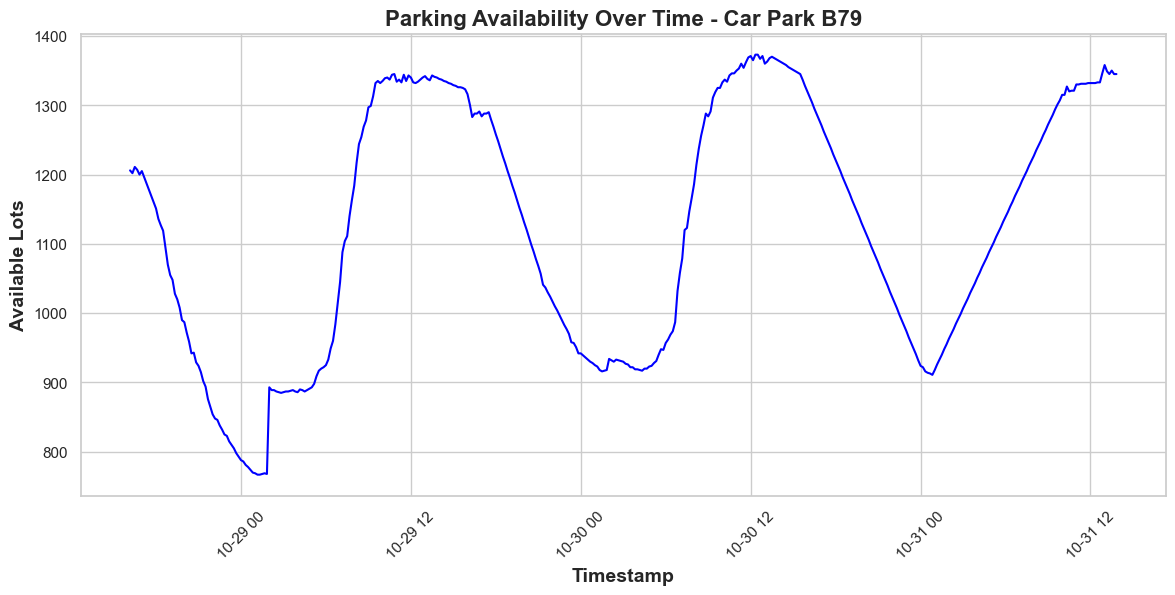

In [27]:
df_1 = resampled_df[resampled_df["carpark_id"] == "B79"]

sns.set (style="whitegrid")

plt.figure (figsize=(14,6))
sns.lineplot(data=df_1, x="timestamp", y="available_lots", color = "blue")

plt.title ("Parking Availability Over Time - Car Park B79", fontsize=16, fontweight='bold')
plt.xlabel ("Timestamp", fontsize=14, fontweight='bold')
plt.ylabel ("Available Lots", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

**Data Preprocessing for LSTM**

LSTM requires specific data formatting:
1. **Scaling**: Normalize values to [0,1] range for stable gradients
2. **Sequence creation**: Create sliding windows of 60 timesteps
3. **Shape transformation**: Reshape to 3D array (samples, timesteps, features)

In [28]:
# Prepare data for LSTM model 
avail_lots = resampled_df[resampled_df["carpark_id"] == "B79"]["available_lots"].values # convert to numpy array

training_data_len = int(np.ceil( len(avail_lots) * 0.85)) # 85% for training

# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(avail_lots.reshape(-1,1))

training_data = scaled_data[:training_data_len] #85% of all out data

X_train, y_train = [], []


# Create a sliding window
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,451 (591.61 KB)

 Trainable params: 151,451 (591.61 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.4499 - val_loss: 0.1919
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1596 - val_loss: 0.0730
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0710 - val_loss: 0.0317
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0636 - val_loss: 0.0157
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0514 - val_loss: 0.0121
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0530 - val_loss: 0.0085
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0430 - val_loss: 0.0132
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0386 - val_loss: 0.0059
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0398 - val_loss: 0.0091
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0339 - val_loss: 0.0187
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0405 - val_loss: 0.0111
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0337 - val_loss: 0.0045
E

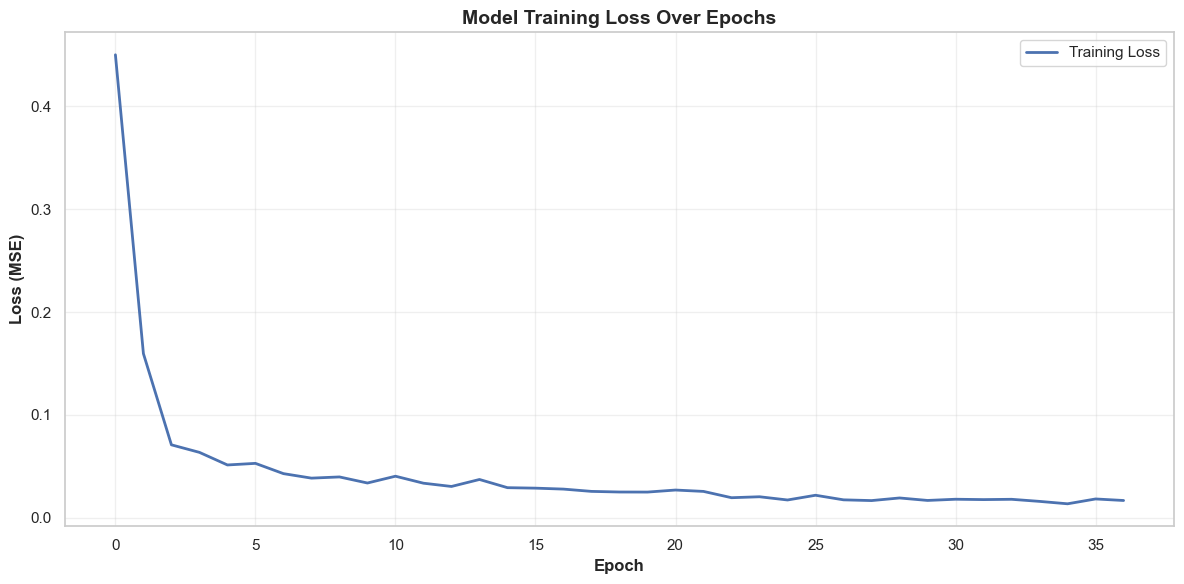

Final training loss: 0.016889


In [39]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.title('Model Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {history.history['loss'][-1]:.6f}")

In [40]:
# Prepare test data
test_data = scaled_data[training_data_len - 60:]

X_test = []
y_test = avail_lots[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"Test data shape: {X_test.shape}")
print(f"Number of test samples: {len(y_test)}")

Test data shape: (62, 60, 1)
Number of test samples: 62


In [41]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(f"Predictions shape: {predictions.shape}")
print(f"Sample predictions (first 10):")
print(predictions[:10].flatten())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predictions shape: (62, 1)
Sample predictions (first 10):
[1029.5363 1037.2883 1045.1906 1053.3776 1061.8988 1070.8047 1080.0562
 1089.5658 1099.2786 1109.0894]


In [42]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"Mean Squared Error (MSE):       {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} lots")
print(f"Mean Absolute Error (MAE):      {mae:.2f} lots")
print(f"R² Score:                       {r2:.4f}")
print("=" * 50)
print(f"\nInterpretation:")
print(f"• On average, predictions are off by ±{mae:.2f} parking lots")
print(f"• The model explains {r2*100:.2f}% of the variance in parking availability")

MODEL PERFORMANCE METRICS
Mean Squared Error (MSE):       159.15
Root Mean Squared Error (RMSE): 12.62 lots
Mean Absolute Error (MAE):      10.14 lots
R² Score:                       0.9844

Interpretation:
• On average, predictions are off by ±10.14 parking lots
• The model explains 98.44% of the variance in parking availability


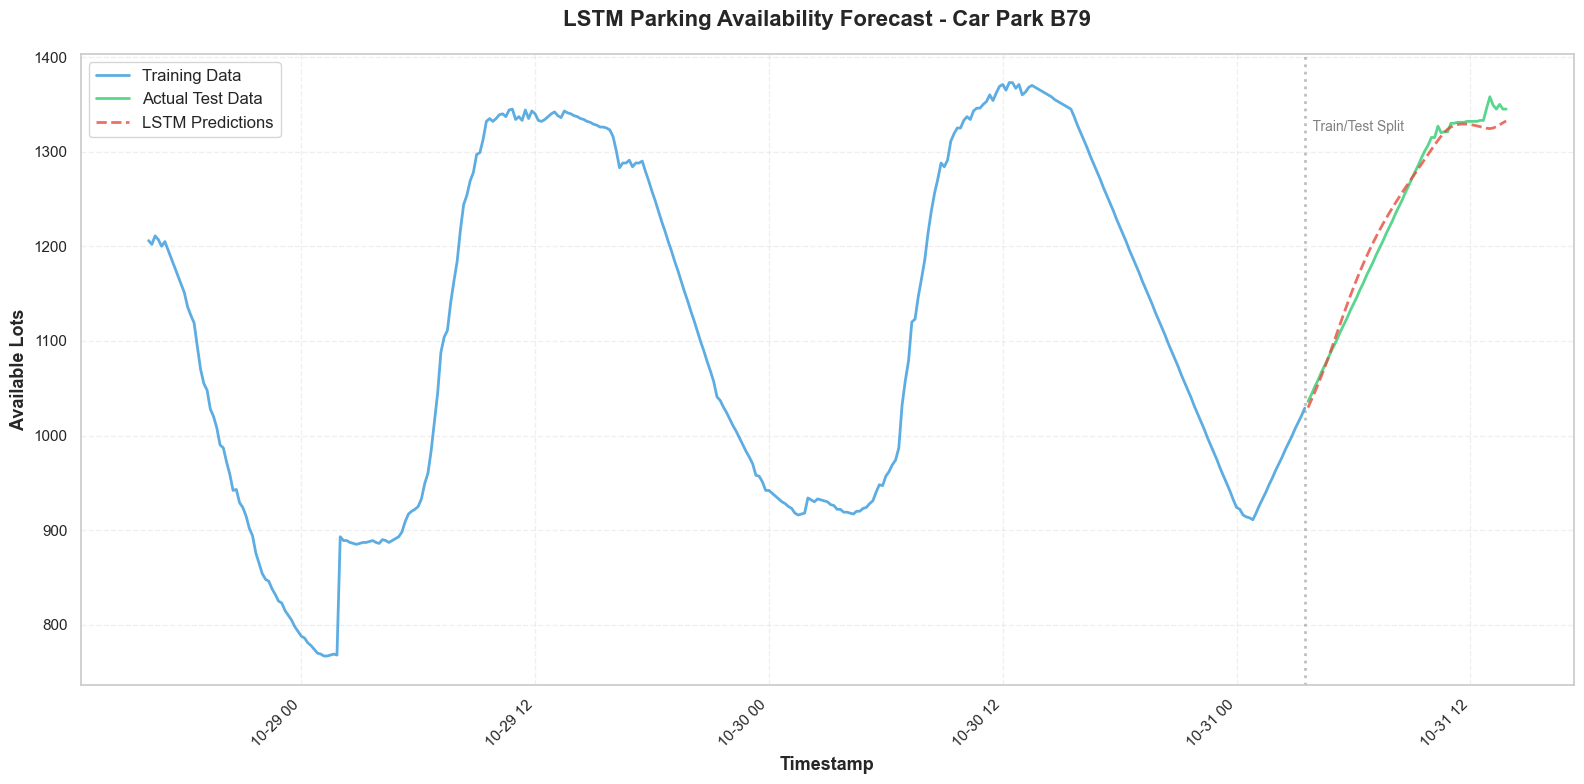

In [43]:
# Visualize predictions vs actual values
train = resampled_df[resampled_df["carpark_id"] == "B79"][:training_data_len]
test = resampled_df[resampled_df["carpark_id"] == "B79"][training_data_len:]

# Create predictions dataframe
valid = test.copy()
valid = valid.iloc[:len(predictions)]  # Match predictions length
valid['predictions'] = predictions

plt.figure(figsize=(16, 8))

# Plot full data
plt.plot(train['timestamp'], train['available_lots'], 
         label='Training Data', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['available_lots'], 
         label='Actual Test Data', color='#2ECC71', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['predictions'], 
         label='LSTM Predictions', color='#E74C3C', linewidth=2, linestyle='--', alpha=0.8)

# Styling
plt.title('LSTM Parking Availability Forecast - Car Park B79', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')

# Add vertical line to separate train/test
plt.axvline(x=train['timestamp'].iloc[-1], color='gray', linestyle=':', linewidth=2, alpha=0.5)
plt.text(train['timestamp'].iloc[-1], plt.ylim()[1] * 0.95, '  Train/Test Split', 
         rotation=0, verticalalignment='top', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

#### **Future Forecasting - 24 Hours Ahead**

**Methodology:**
- Use the trained LSTM model to predict the next 24 hours (144 intervals)
- **Iterative prediction**: Each prediction becomes input for the next timestep
- **Rolling window**: Maintain 60-step history, dropping oldest and adding newest

**Output:**
- 144 future predictions at 10-minute intervals
- Timestamps for each prediction
- Hourly aggregations for easier interpretation

In [44]:
# Forecast the next 24 hours (144 time steps, since data is in 10-min intervals)
forecast_steps = 144  # 24 hours * 6 (10-min intervals per hour)

# Get the last 60 data points to start forecasting
last_60_points = scaled_data[-60:]
forecast_input = last_60_points.reshape(1, 60, 1)

# Store forecasted values
future_predictions = []

# Iteratively predict
for _ in range(forecast_steps):
    # Predict next value (model.predict returns array shaped (1,1))
    next_pred = model.predict(forecast_input, verbose=0)
    # Append scalar prediction
    future_predictions.append(float(next_pred.ravel()[0]))
    
    # Prepare new element with the same 3D shape as forecast_input: (1, 1, 1)
    new_element = next_pred.reshape(1, 1, 1)
    
    # Update input: drop oldest timestep and append new prediction along time axis
    forecast_input = np.concatenate([forecast_input[:, 1:, :], new_element], axis=1)

# Convert predictions back to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create timestamps for future predictions
last_timestamp = resampled_df[resampled_df["carpark_id"] == "B79"]["timestamp"].iloc[-1]
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(minutes=10), 
                                  periods=forecast_steps, 
                                  freq='10min')

print(f"Generated {len(future_predictions)} future predictions")
print(f"Forecast period: {future_timestamps[0]} to {future_timestamps[-1]}")

Generated 144 future predictions
Forecast period: 2025-10-31 14:00:00 to 2025-11-01 13:50:00


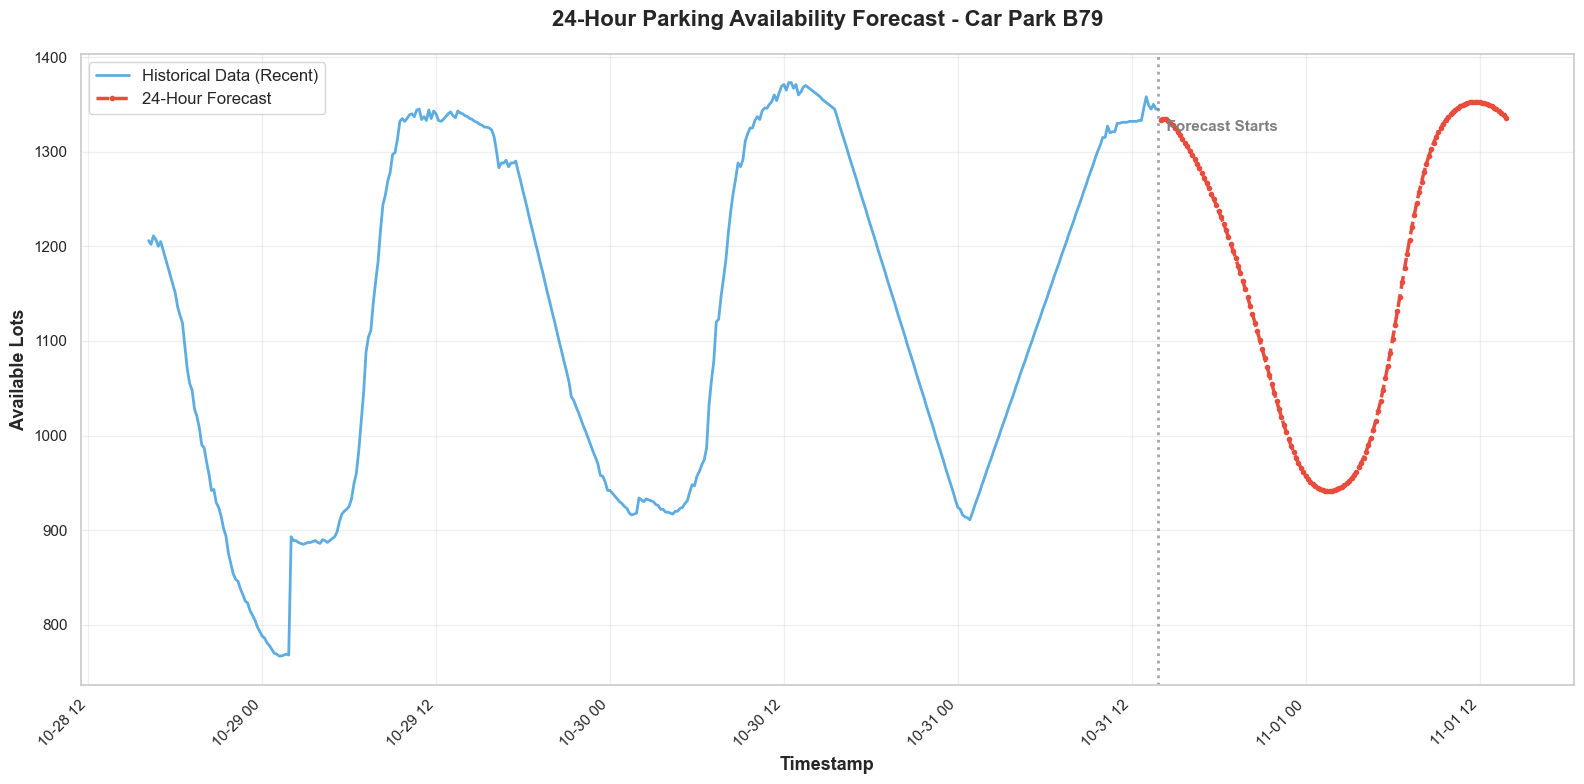

In [45]:
# Visualize future forecast
plt.figure(figsize=(16, 8))

# Get recent historical data (last 7 days for context)
recent_data = resampled_df[resampled_df["carpark_id"] == "B79"].tail(1000)

plt.plot(recent_data['timestamp'], recent_data['available_lots'], 
         label='Historical Data (Recent)', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(future_timestamps, future_predictions, 
         label='24-Hour Forecast', color='#E74C3C', linewidth=2.5, linestyle='--', marker='o', markersize=3)

# Add vertical line at forecast start
plt.axvline(x=last_timestamp, color='gray', linestyle=':', linewidth=2, alpha=0.7)
plt.text(last_timestamp, plt.ylim()[1] * 0.95, '  Forecast Starts', 
         rotation=0, verticalalignment='top', fontsize=11, color='gray', fontweight='bold')

plt.title('24-Hour Parking Availability Forecast - Car Park B79', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

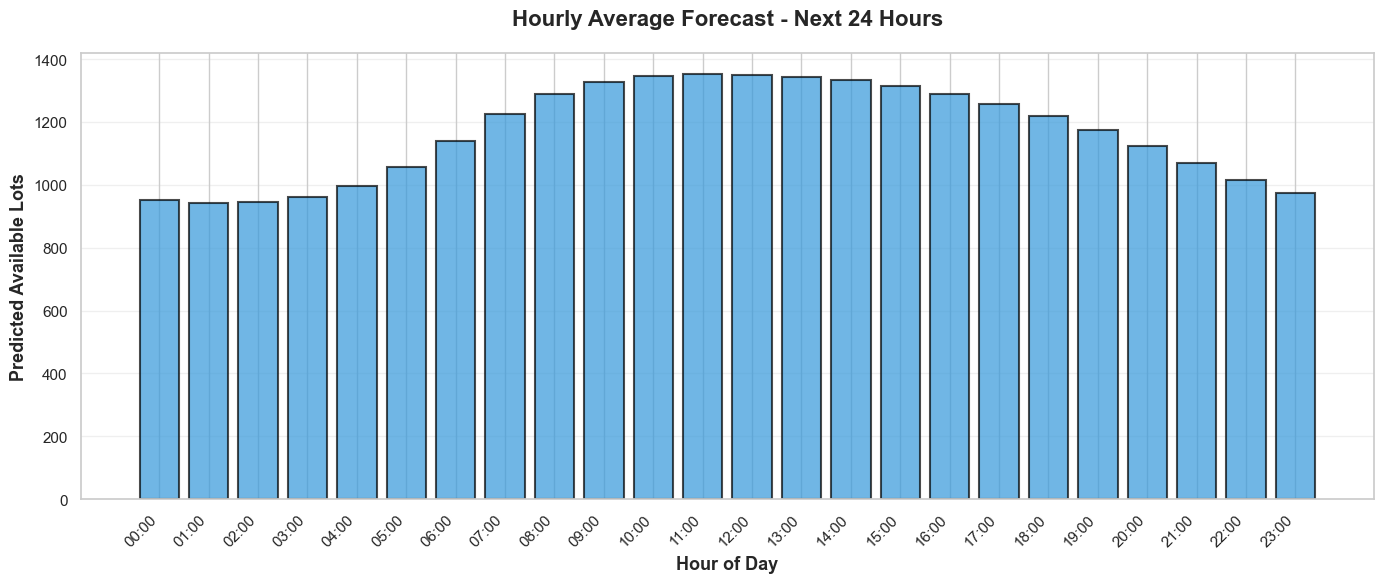


24-HOUR FORECAST INSIGHTS
Minimum predicted availability: 942 lots at 2025-11-01 01:40:00
Maximum predicted availability: 1353 lots at 2025-11-01 11:40:00
Average predicted availability: 1166 lots


In [46]:
# Create hourly summary of forecast
forecast_df = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_available_lots': future_predictions.flatten()
})

forecast_df['hour'] = forecast_df['timestamp'].dt.hour
hourly_forecast = forecast_df.groupby('hour')['predicted_available_lots'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.bar(hourly_forecast['hour'], hourly_forecast['predicted_available_lots'], 
        color='#3498DB', alpha=0.7, edgecolor='black', linewidth=1.5)

plt.title('Hourly Average Forecast - Next 24 Hours', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Available Lots', fontsize=13, fontweight='bold')
plt.xticks(hourly_forecast['hour'], [f'{h:02d}:00' for h in hourly_forecast['hour']], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print forecast insights
print("\n" + "=" * 60)
print("24-HOUR FORECAST INSIGHTS")
print("=" * 60)
print(f"Minimum predicted availability: {future_predictions.min():.0f} lots at {future_timestamps[future_predictions.argmin()]}")
print(f"Maximum predicted availability: {future_predictions.max():.0f} lots at {future_timestamps[future_predictions.argmax()]}")
print(f"Average predicted availability: {future_predictions.mean():.0f} lots")
print("=" * 60)

#### **Test Case 2: Tampines Mall**

**Carpark Profile:**
- Location: Large shopping mall carpark
- Selected for: High capacity and complex usage patterns
- Purpose: Test model on high-volume, variable-demand scenario

**Characteristics:**
- Higher capacity than B79
- Strong daily patterns (shopping hours)
- Weekend vs weekday variations
- More challenging prediction target

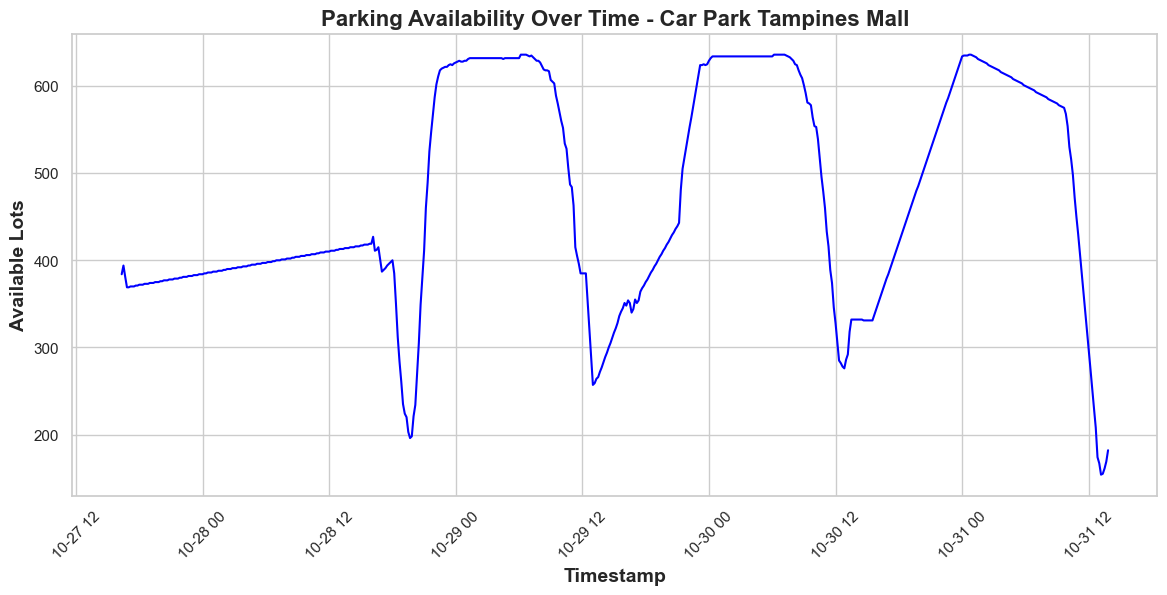

In [47]:
df_2 = resampled_df[resampled_df["development"] == "Tampines Mall"]

sns.set (style="whitegrid")

plt.figure (figsize=(14,6))
sns.lineplot(data=df_2, x="timestamp", y="available_lots", color = "blue")

plt.title ("Parking Availability Over Time - Car Park Tampines Mall", fontsize=16, fontweight='bold')
plt.xlabel ("Timestamp", fontsize=14, fontweight='bold')
plt.ylabel ("Available Lots", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

In [48]:
# Prepare data for LSTM model 
avail_lots = resampled_df[resampled_df["development"] == "Tampines Mall"]["available_lots"].values # convert to numpy array

training_data_len = int(np.ceil( len(avail_lots) * 0.85)) # 85% for training

# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(avail_lots.reshape(-1,1))

training_data = scaled_data[:training_data_len] #85% of all out data

X_train, y_train = [], []


# Create a sliding window
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [49]:
# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,451 (591.61 KB)

 Trainable params: 151,451 (591.61 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    batch_size=32,
    validation_split=0.2,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.4651 - val_loss: 0.2868
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2147 - val_loss: 0.1334
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1057 - val_loss: 0.0758
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0775 - val_loss: 0.0820
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0555 - val_loss: 0.0668
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0537 - val_loss: 0.0690
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0394 - val_loss: 0.0678
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0427 - val_loss: 0.0630
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0388 - val_loss: 0.0544
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0388 - val_loss: 0.0414
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0346 - val_loss: 0.0363
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0

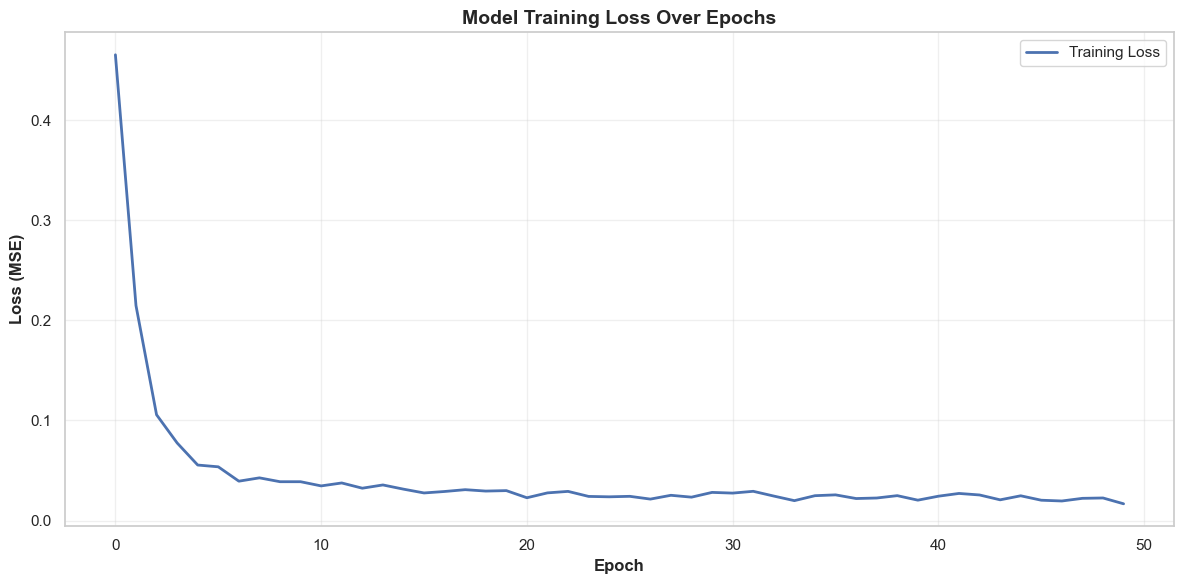

Final training loss: 0.016775


In [51]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.title('Model Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {history.history['loss'][-1]:.6f}")

In [52]:
# Prepare test data
test_data = scaled_data[training_data_len - 60:]

X_test = []
y_test = avail_lots[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"Test data shape: {X_test.shape}")
print(f"Number of test samples: {len(y_test)}")

Test data shape: (84, 60, 1)
Number of test samples: 84


In [53]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(f"Predictions shape: {predictions.shape}")
print(f"Sample predictions (first 10):")
print(predictions[:10].flatten())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predictions shape: (84, 1)
Sample predictions (first 10):
[621.37897 627.13306 632.61487 637.2939  640.7021  642.6389  643.1201
 642.26715 640.29193 637.48834]


In [54]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"Mean Squared Error (MSE):       {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} lots")
print(f"Mean Absolute Error (MAE):      {mae:.2f} lots")
print(f"R² Score:                       {r2:.4f}")
print("=" * 50)
print(f"\nInterpretation:")
print(f"• On average, predictions are off by ±{mae:.2f} parking lots")
print(f"• The model explains {r2*100:.2f}% of the variance in parking availability")

MODEL PERFORMANCE METRICS
Mean Squared Error (MSE):       749.05
Root Mean Squared Error (RMSE): 27.37 lots
Mean Absolute Error (MAE):      15.74 lots
R² Score:                       0.9662

Interpretation:
• On average, predictions are off by ±15.74 parking lots
• The model explains 96.62% of the variance in parking availability


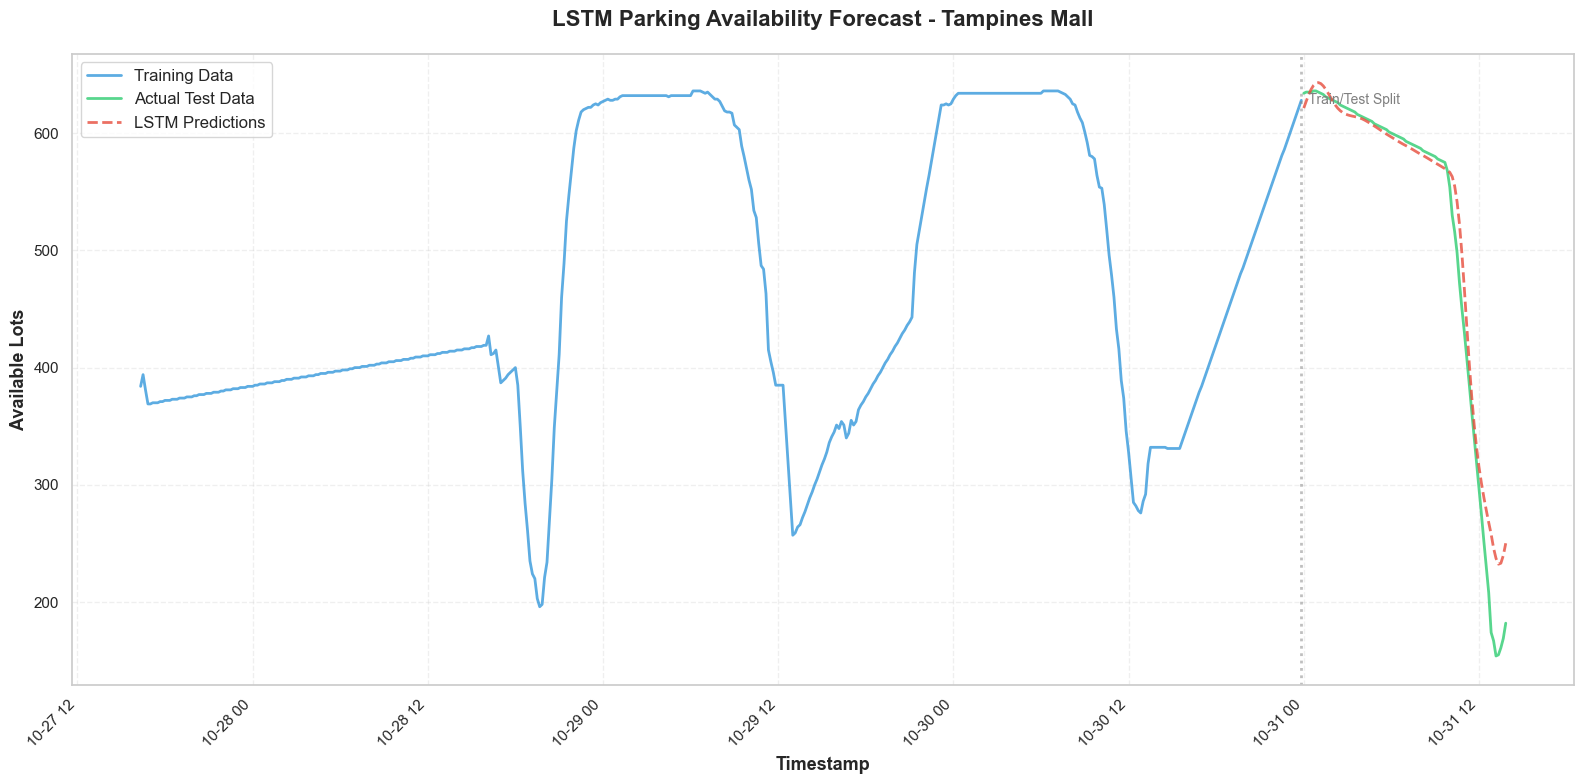

In [55]:
# Visualize predictions vs actual values
train = resampled_df[resampled_df["development"] == "Tampines Mall"][:training_data_len]
test = resampled_df[resampled_df["development"] == "Tampines Mall"][training_data_len:]

# Create predictions dataframe
valid = test.copy()
valid = valid.iloc[:len(predictions)]  # Match predictions length
valid['predictions'] = predictions

plt.figure(figsize=(16, 8))

# Plot full data
plt.plot(train['timestamp'], train['available_lots'], 
         label='Training Data', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['available_lots'], 
         label='Actual Test Data', color='#2ECC71', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['predictions'], 
         label='LSTM Predictions', color='#E74C3C', linewidth=2, linestyle='--', alpha=0.8)

# Styling
plt.title('LSTM Parking Availability Forecast - Tampines Mall', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')

# Add vertical line to separate train/test
plt.axvline(x=train['timestamp'].iloc[-1], color='gray', linestyle=':', linewidth=2, alpha=0.5)
plt.text(train['timestamp'].iloc[-1], plt.ylim()[1] * 0.95, '  Train/Test Split', 
         rotation=0, verticalalignment='top', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

In [56]:
# Forecast the next 24 hours (144 time steps, since data is in 10-min intervals)
forecast_steps = 144  # 24 hours * 6 (10-min intervals per hour)

# Get the last 60 data points to start forecasting
last_60_points = scaled_data[-60:]
forecast_input = last_60_points.reshape(1, 60, 1)

# Store forecasted values
future_predictions = []

# Iteratively predict
for _ in range(forecast_steps):
    # Predict next value (model.predict returns array shaped (1,1))
    next_pred = model.predict(forecast_input, verbose=0)
    # Append scalar prediction
    future_predictions.append(float(next_pred.ravel()[0]))
    
    # Prepare new element with the same 3D shape as forecast_input: (1, 1, 1)
    new_element = next_pred.reshape(1, 1, 1)
    
    # Update input: drop oldest timestep and append new prediction along time axis
    forecast_input = np.concatenate([forecast_input[:, 1:, :], new_element], axis=1)

# Convert predictions back to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create timestamps for future predictions
last_timestamp = resampled_df[resampled_df["development"] == "Tampines Mall"]["timestamp"].iloc[-1]
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(minutes=10), 
                                  periods=forecast_steps, 
                                  freq='10min')

print(f"Generated {len(future_predictions)} future predictions")
print(f"Forecast period: {future_timestamps[0]} to {future_timestamps[-1]}")

Generated 144 future predictions
Forecast period: 2025-10-31 14:00:00 to 2025-11-01 13:50:00


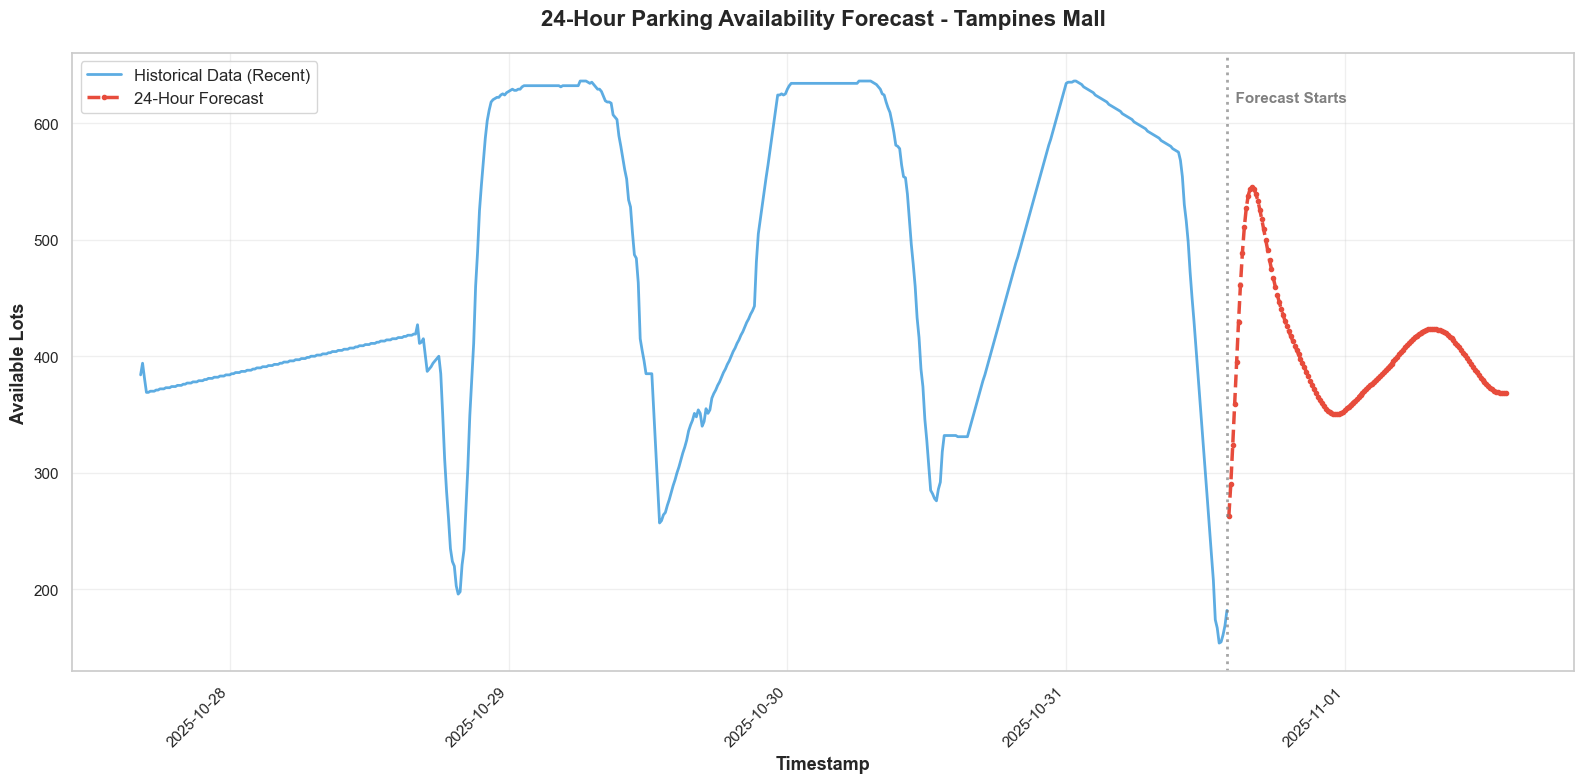

In [57]:
# Visualize future forecast
plt.figure(figsize=(16, 8))

# Get recent historical data (last 7 days for context)
recent_data = resampled_df[resampled_df["development"] == "Tampines Mall"].tail(1000)

plt.plot(recent_data['timestamp'], recent_data['available_lots'], 
         label='Historical Data (Recent)', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(future_timestamps, future_predictions, 
         label='24-Hour Forecast', color='#E74C3C', linewidth=2.5, linestyle='--', marker='o', markersize=3)

# Add vertical line at forecast start
plt.axvline(x=last_timestamp, color='gray', linestyle=':', linewidth=2, alpha=0.7)
plt.text(last_timestamp, plt.ylim()[1] * 0.95, '  Forecast Starts', 
         rotation=0, verticalalignment='top', fontsize=11, color='gray', fontweight='bold')

plt.title('24-Hour Parking Availability Forecast - Tampines Mall', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

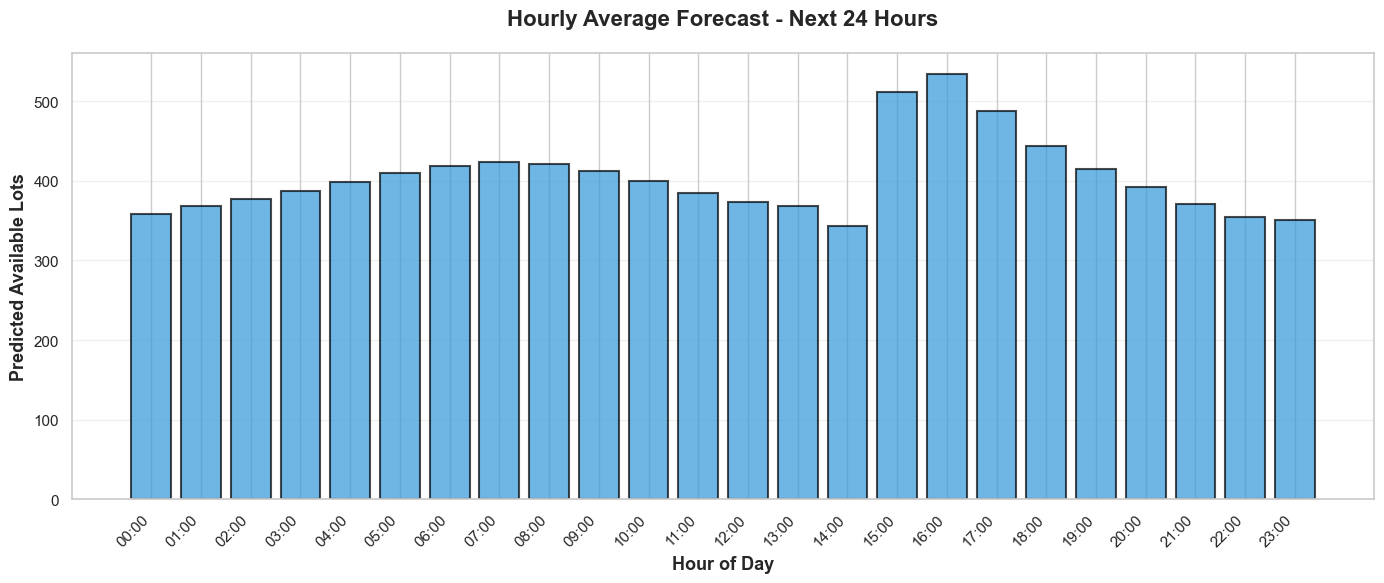


24-HOUR FORECAST INSIGHTS
Minimum predicted availability: 263 lots at 2025-10-31 14:00:00
Maximum predicted availability: 545 lots at 2025-10-31 16:00:00
Average predicted availability: 404 lots


In [58]:
# Create hourly summary of forecast
forecast_df = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_available_lots': future_predictions.flatten()
})

forecast_df['hour'] = forecast_df['timestamp'].dt.hour
hourly_forecast = forecast_df.groupby('hour')['predicted_available_lots'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.bar(hourly_forecast['hour'], hourly_forecast['predicted_available_lots'], 
        color='#3498DB', alpha=0.7, edgecolor='black', linewidth=1.5)

plt.title('Hourly Average Forecast - Next 24 Hours', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Available Lots', fontsize=13, fontweight='bold')
plt.xticks(hourly_forecast['hour'], [f'{h:02d}:00' for h in hourly_forecast['hour']], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print forecast insights
print("\n" + "=" * 60)
print("24-HOUR FORECAST INSIGHTS")
print("=" * 60)
print(f"Minimum predicted availability: {future_predictions.min():.0f} lots at {future_timestamps[future_predictions.argmin()]}")
print(f"Maximum predicted availability: {future_predictions.max():.0f} lots at {future_timestamps[future_predictions.argmax()]}")
print(f"Average predicted availability: {future_predictions.mean():.0f} lots")
print("=" * 60)

### **1.2 Linear Regression (Time Series - Darts Library)**

#### **Model Overview**
Darts LinearRegressionModel is a specialized time series forecasting approach that:
- Uses lagged values as features (autoregression)
- Assumes linear relationships between past and future values
- Provides fast training and inference
- Serves as a strong baseline for comparison

**Key Parameters:**
- **Lags**: 144 timesteps (24 hours) - uses previous day's pattern
- **Training**: 85% of data
- **Validation**: 15% held out for testing

**Advantages:**
- Simple and interpretable
- Fast to train
- Good for data with linear trends
- Minimal hyperparameter tuning

**Limitations:**
- Cannot capture complex non-linear patterns
- Assumes stationarity in the data
- May struggle with sudden changes in demand

In [59]:
from darts import TimeSeries
from darts.models import LinearRegressionModel
from darts.metrics import mape

The StatsForecast module could not be imported. To enable support for the AutoARIMA, AutoETS and Croston models, please consider installing it.
The `XGBoost` module could not be imported. To enable XGBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `XGBoost` module could not be imported. To enable XGBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


#### **Test Case 1: Car Park B79**

Using the same carpark as LSTM for direct model comparison.

Mean Absolute Percentage Error (MAPE): 4.69%


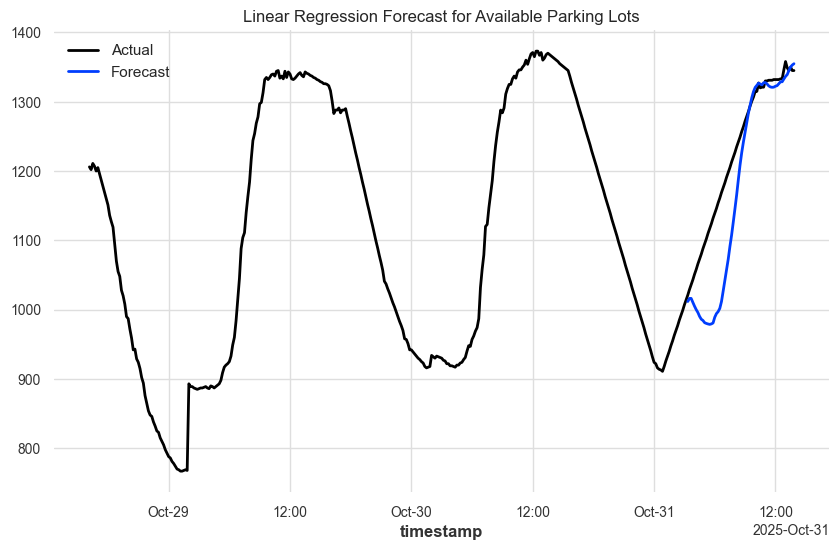

In [60]:
series = TimeSeries.from_dataframe(
    df_1, 
    time_col='timestamp',
    value_cols='available_lots',
    fill_missing_dates=True,
    freq=None
)

train, val = series.split_before(0.85)

model = LinearRegressionModel(lags=144)
model.fit(train)

forecast = model.predict(len(val))
error = mape(val, forecast)
print(f'Mean Absolute Percentage Error (MAPE): {error:.2f}%')

plt.figure(figsize=(10, 6))
series.plot(label="Actual")
forecast.plot(label="Forecast")
plt.title("Linear Regression Forecast for Available Parking Lots")
plt.legend()
plt.show()

#### **24-Hour Future Forecast (Linear Regression)**

**Forecasting Process:**
1. Model trained on historical patterns
2. Predict next 144 intervals (24 hours)
3. Automatic handling of lagged features by Darts library

**Advantages over LSTM:**
- Faster prediction
- No iterative process needed
- More stable for long-term forecasts

**Output includes:**
- Time series visualization
- Hourly aggregations
- Best parking times recommendations

In [61]:
# Generate 24-hour future forecast using Linear Regression model
forecast_steps = 144  # 24 hours * 6 (10-min intervals per hour)

# Predict future values
future_forecast = model.predict(forecast_steps)

# Extract timestamps and values
future_timestamps_lr = future_forecast.time_index
future_predictions_lr = future_forecast.values().flatten()

print(f"Generated {len(future_predictions_lr)} future predictions")
print(f"Forecast period: {future_timestamps_lr[0]} to {future_timestamps_lr[-1]}")
print(f"Predicted range: {future_predictions_lr.min():.1f} to {future_predictions_lr.max():.1f} lots")

Generated 144 future predictions
Forecast period: 2025-10-31 03:20:00 to 2025-11-01 03:10:00
Predicted range: 920.7 to 1361.5 lots


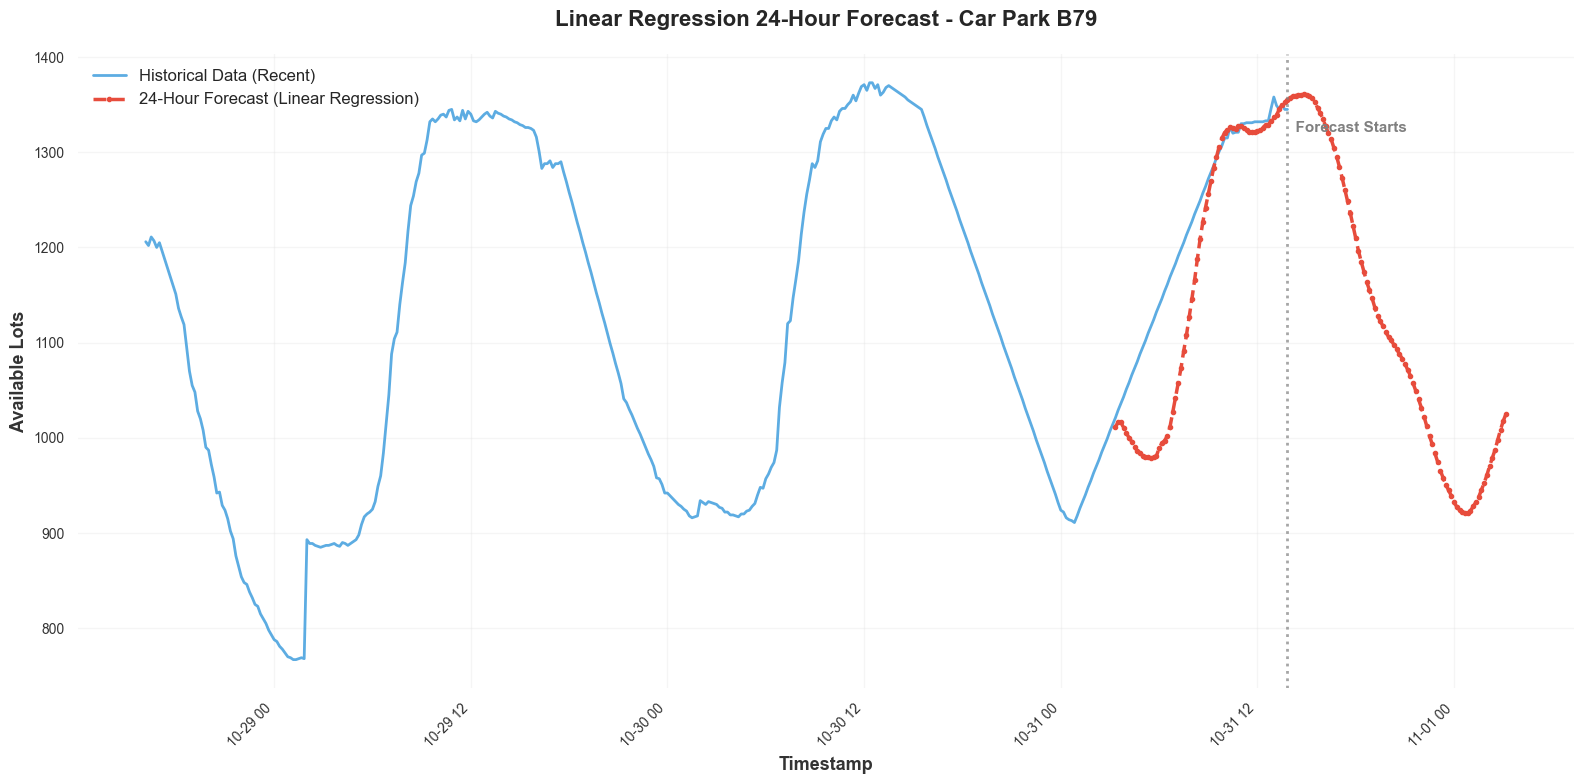

In [62]:
# Visualize future forecast
plt.figure(figsize=(16, 8))

# Get recent historical data
recent_data = df_1.tail(1000)

plt.plot(recent_data['timestamp'], recent_data['available_lots'], 
         label='Historical Data (Recent)', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(future_timestamps_lr, future_predictions_lr, 
         label='24-Hour Forecast (Linear Regression)', color='#E74C3C', linewidth=2.5, 
         linestyle='--', marker='o', markersize=3)

# Add vertical line at forecast start
last_timestamp_lr = df_1['timestamp'].iloc[-1]
plt.axvline(x=last_timestamp_lr, color='gray', linestyle=':', linewidth=2, alpha=0.7)
plt.text(last_timestamp_lr, plt.ylim()[1] * 0.95, '  Forecast Starts', 
         rotation=0, verticalalignment='top', fontsize=11, color='gray', fontweight='bold')

plt.title('Linear Regression 24-Hour Forecast - Car Park B79', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

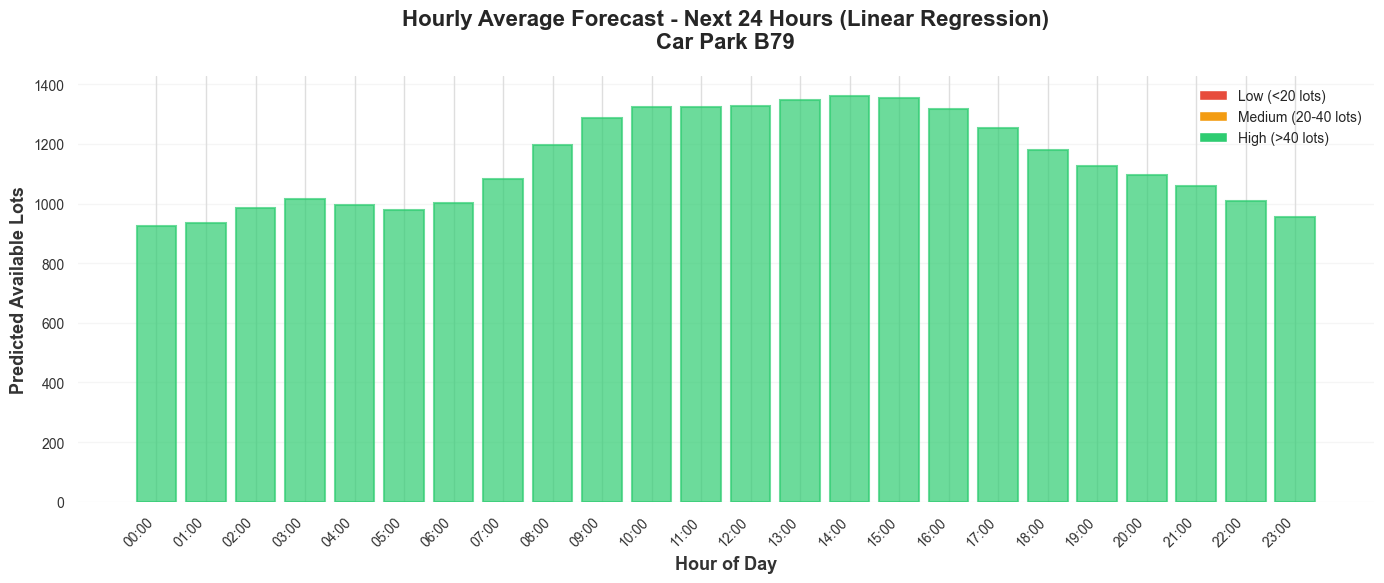


24-HOUR FORECAST INSIGHTS (Linear Regression)
Minimum availability: 920.7 lots at 2025-11-01 00:50:00
Maximum availability: 1361.5 lots at 2025-10-31 14:50:00
Average availability: 1143.1 lots

✓ Best times to find parking (above average):
  • 08:00 - ~1146 lots available
  • 08:10 - ~1166 lots available
  • 08:20 - ~1188 lots available
  • 08:30 - ~1209 lots available
  • 08:40 - ~1227 lots available


In [63]:
# Hourly forecast summary
forecast_df_lr = pd.DataFrame({
    'timestamp': future_timestamps_lr,
    'predicted_available_lots': future_predictions_lr
})

forecast_df_lr['hour'] = pd.to_datetime(forecast_df_lr['timestamp']).dt.hour
hourly_forecast_lr = forecast_df_lr.groupby('hour')['predicted_available_lots'].mean().reset_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(hourly_forecast_lr['hour'], hourly_forecast_lr['predicted_available_lots'], 
        color='#3498DB', alpha=0.7, edgecolor='black', linewidth=1.5)

# Color bars by availability level
for i, bar in enumerate(bars):
    if hourly_forecast_lr['predicted_available_lots'].iloc[i] < 20:
        bar.set_color('#E74C3C')  # Red for low availability
    elif hourly_forecast_lr['predicted_available_lots'].iloc[i] < 40:
        bar.set_color('#F39C12')  # Orange for medium
    else:
        bar.set_color('#2ECC71')  # Green for high

plt.title('Hourly Average Forecast - Next 24 Hours (Linear Regression)\nCar Park B79', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Available Lots', fontsize=13, fontweight='bold')
plt.xticks(hourly_forecast_lr['hour'], [f'{h:02d}:00' for h in hourly_forecast_lr['hour']], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#E74C3C', label='Low (<20 lots)'),
    Patch(facecolor='#F39C12', label='Medium (20-40 lots)'),
    Patch(facecolor='#2ECC71', label='High (>40 lots)')
]
plt.legend(handles=legend_elements, loc='best', fontsize=10)

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "=" * 70)
print("24-HOUR FORECAST INSIGHTS (Linear Regression)")
print("=" * 70)
min_idx = np.argmin(future_predictions_lr)
max_idx = np.argmax(future_predictions_lr)
print(f"Minimum availability: {future_predictions_lr[min_idx]:.1f} lots at {future_timestamps_lr[min_idx]}")
print(f"Maximum availability: {future_predictions_lr[max_idx]:.1f} lots at {future_timestamps_lr[max_idx]}")
print(f"Average availability: {np.mean(future_predictions_lr):.1f} lots")
print("=" * 70)

# Best times to visit
good_times = [i for i, pred in enumerate(future_predictions_lr) if pred > np.mean(future_predictions_lr)]
if good_times:
    print(f"\n✓ Best times to find parking (above average):")
    for i in good_times[:5]:  # Show first 5
        print(f"  • {pd.to_datetime(future_timestamps_lr[i]).strftime('%H:%M')} - ~{future_predictions_lr[i]:.0f} lots available")

#### **Test Case 2: Tampines Mall**

Testing Linear Regression on high-capacity mall parking to evaluate performance on more complex patterns.

Mean Absolute Percentage Error (MAPE): 18.08%


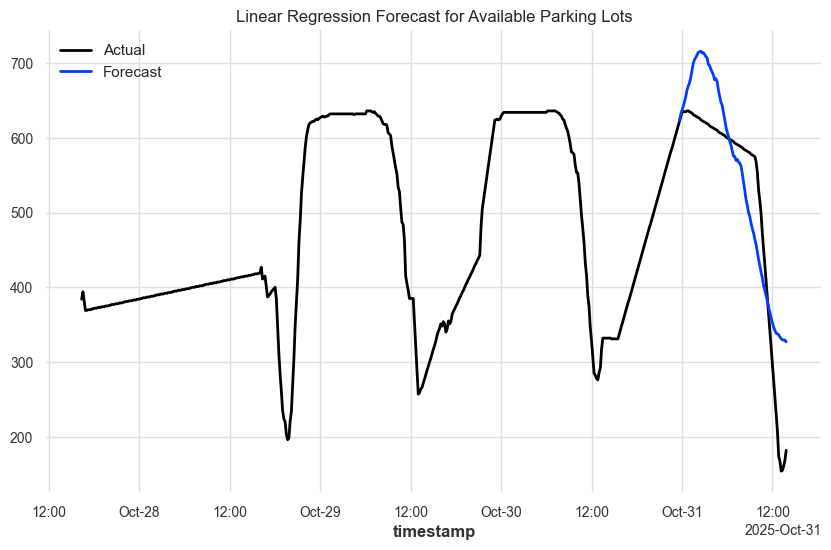

In [64]:
series = TimeSeries.from_dataframe(
    df_2, 
    time_col='timestamp',
    value_cols='available_lots',
    fill_missing_dates=True,
    freq=None
)

train, val = series.split_before(0.85)

model = LinearRegressionModel(lags=144)
model.fit(train)

forecast = model.predict(len(val))
error = mape(val, forecast)
print(f'Mean Absolute Percentage Error (MAPE): {error:.2f}%')

plt.figure(figsize=(10, 6))
series.plot(label="Actual")
forecast.plot(label="Forecast")
plt.title("Linear Regression Forecast for Available Parking Lots")
plt.legend()
plt.show()

#### **24-Hour Future Forecast - Tampines Mall**

Generate predictions for the mall's parking availability to help shoppers plan their visits.

In [65]:
# Generate 24-hour future forecast using Linear Regression model
forecast_steps = 144  # 24 hours * 6 (10-min intervals per hour)

# Predict future values
future_forecast_tm = model.predict(forecast_steps)

# Extract timestamps and values
future_timestamps_lr_tm = future_forecast_tm.time_index
future_predictions_lr_tm = future_forecast_tm.values().flatten()

print(f"Generated {len(future_predictions_lr_tm)} future predictions")
print(f"Forecast period: {future_timestamps_lr_tm[0]} to {future_timestamps_lr_tm[-1]}")
print(f"Predicted range: {future_predictions_lr_tm.min():.1f} to {future_predictions_lr_tm.max():.1f} lots")

Generated 144 future predictions
Forecast period: 2025-10-30 23:40:00 to 2025-10-31 23:30:00
Predicted range: 324.8 to 716.0 lots


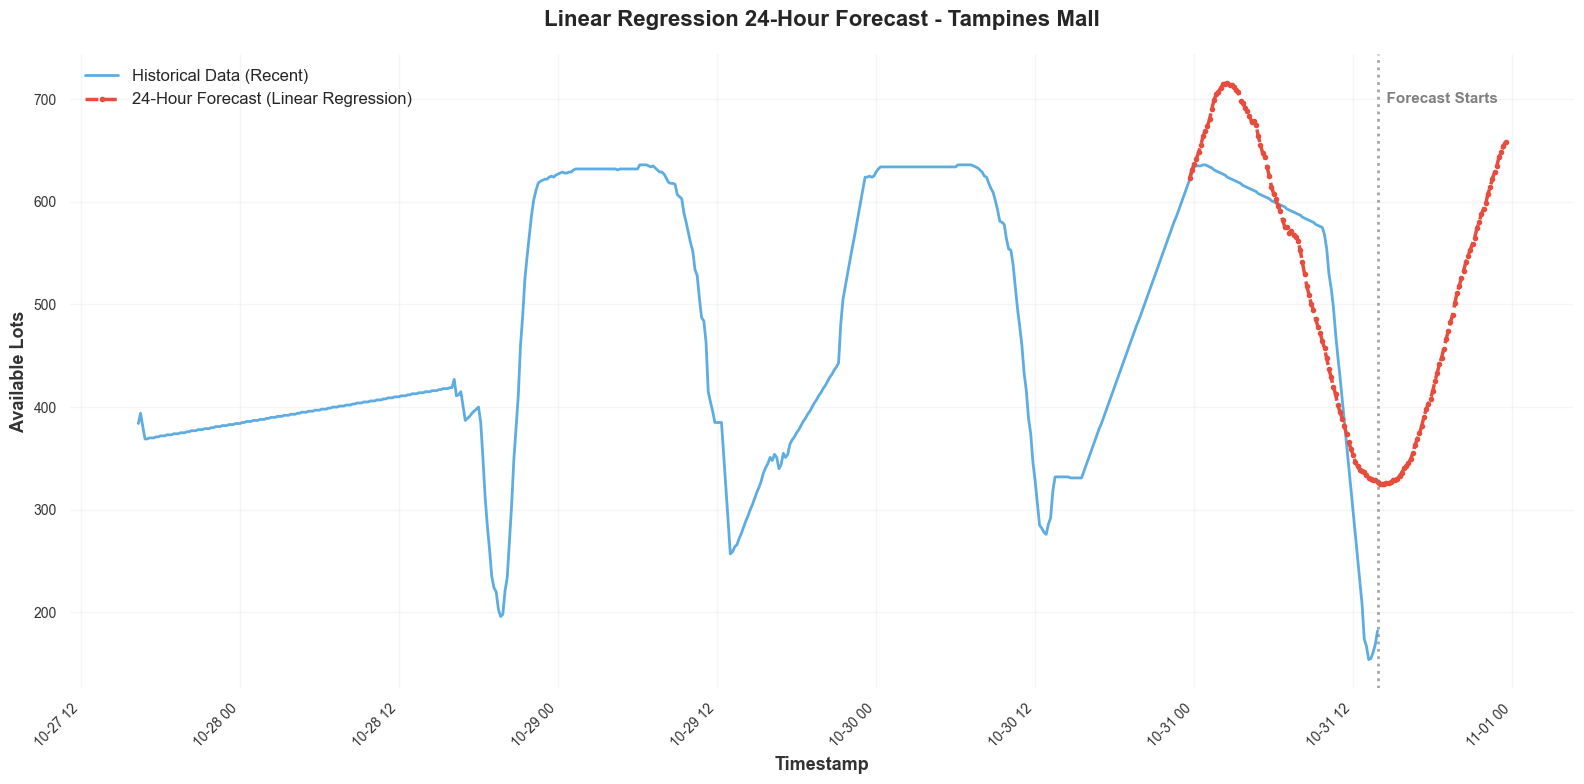

In [66]:
# Visualize future forecast
plt.figure(figsize=(16, 8))

# Get recent historical data
recent_data_tm = df_2.tail(1000)

plt.plot(recent_data_tm['timestamp'], recent_data_tm['available_lots'], 
         label='Historical Data (Recent)', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(future_timestamps_lr_tm, future_predictions_lr_tm, 
         label='24-Hour Forecast (Linear Regression)', color='#E74C3C', linewidth=2.5, 
         linestyle='--', marker='o', markersize=3)

# Add vertical line at forecast start
last_timestamp_lr_tm = df_2['timestamp'].iloc[-1]
plt.axvline(x=last_timestamp_lr_tm, color='gray', linestyle=':', linewidth=2, alpha=0.7)
plt.text(last_timestamp_lr_tm, plt.ylim()[1] * 0.95, '  Forecast Starts', 
         rotation=0, verticalalignment='top', fontsize=11, color='gray', fontweight='bold')

plt.title('Linear Regression 24-Hour Forecast - Tampines Mall', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

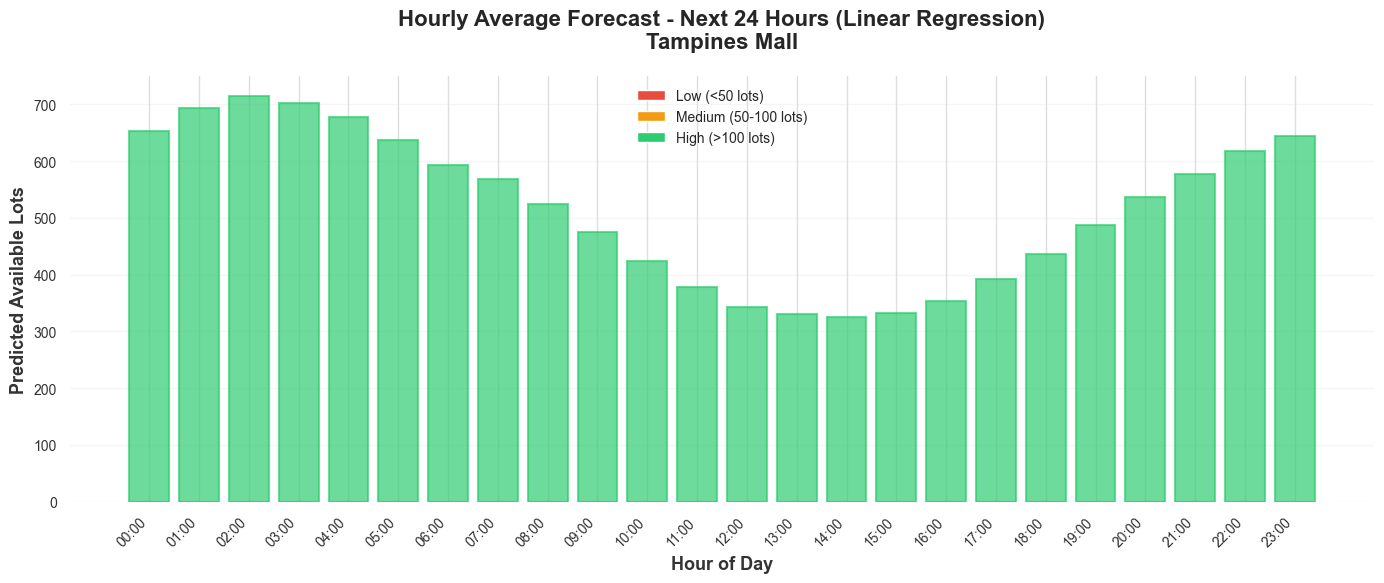


24-HOUR FORECAST INSIGHTS (Linear Regression)
Minimum availability: 324.8 lots at 2025-10-31 14:00:00
Maximum availability: 716.0 lots at 2025-10-31 02:30:00
Average availability: 517.3 lots

✓ Best times to find parking (above average):
  • 23:40 - ~623 lots available
  • 23:50 - ~631 lots available
  • 00:00 - ~637 lots available
  • 00:10 - ~642 lots available
  • 00:20 - ~648 lots available


In [67]:
# Hourly forecast summary
forecast_df_lr_tm = pd.DataFrame({
    'timestamp': future_timestamps_lr_tm,
    'predicted_available_lots': future_predictions_lr_tm
})

forecast_df_lr_tm['hour'] = pd.to_datetime(forecast_df_lr_tm['timestamp']).dt.hour
hourly_forecast_lr_tm = forecast_df_lr_tm.groupby('hour')['predicted_available_lots'].mean().reset_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(hourly_forecast_lr_tm['hour'], hourly_forecast_lr_tm['predicted_available_lots'], 
        color='#3498DB', alpha=0.7, edgecolor='black', linewidth=1.5)

# Color bars by availability level
for i, bar in enumerate(bars):
    if hourly_forecast_lr_tm['predicted_available_lots'].iloc[i] < 50:
        bar.set_color('#E74C3C')  # Red for low availability
    elif hourly_forecast_lr_tm['predicted_available_lots'].iloc[i] < 100:
        bar.set_color('#F39C12')  # Orange for medium
    else:
        bar.set_color('#2ECC71')  # Green for high

plt.title('Hourly Average Forecast - Next 24 Hours (Linear Regression)\nTampines Mall', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Available Lots', fontsize=13, fontweight='bold')
plt.xticks(hourly_forecast_lr_tm['hour'], [f'{h:02d}:00' for h in hourly_forecast_lr_tm['hour']], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#E74C3C', label='Low (<50 lots)'),
    Patch(facecolor='#F39C12', label='Medium (50-100 lots)'),
    Patch(facecolor='#2ECC71', label='High (>100 lots)')
]
plt.legend(handles=legend_elements, loc='best', fontsize=10)

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "=" * 70)
print("24-HOUR FORECAST INSIGHTS (Linear Regression)")
print("=" * 70)
min_idx = np.argmin(future_predictions_lr_tm)
max_idx = np.argmax(future_predictions_lr_tm)
print(f"Minimum availability: {future_predictions_lr_tm[min_idx]:.1f} lots at {future_timestamps_lr_tm[min_idx]}")
print(f"Maximum availability: {future_predictions_lr_tm[max_idx]:.1f} lots at {future_timestamps_lr_tm[max_idx]}")
print(f"Average availability: {np.mean(future_predictions_lr_tm):.1f} lots")
print("=" * 70)

# Best times to visit
good_times = [i for i, pred in enumerate(future_predictions_lr_tm) if pred > np.mean(future_predictions_lr_tm)]
if good_times:
    print(f"\n✓ Best times to find parking (above average):")
    for i in good_times[:5]:  # Show first 5
        print(f"  • {pd.to_datetime(future_timestamps_lr_tm[i]).strftime('%H:%M')} - ~{future_predictions_lr_tm[i]:.0f} lots available")

### **1.3 Random Forest Regressor**

#### **Model Overview**
Random Forest is an ensemble learning method that combines multiple decision trees to make predictions.

**Why Random Forest for Parking?**
- **Multi-feature capability**: Can utilize time features, location data, historical patterns
- **Non-linear relationships**: Captures complex interactions between features
- **Robust to outliers**: Less sensitive to anomalous data points
- **Feature importance**: Identifies which factors most influence parking availability

**Feature Engineering:**
The model leverages multiple feature types:

1. **Temporal Features:**
   - Hour of day (0-23)
   - Day of week (0-6)
   - Weekend indicator
   - Day of month
   - Month

2. **Lag Features:**
   - Previous 1, 2, 3 timesteps
   - 1-hour ago (6 steps)
   - 2-hours ago (12 steps)

3. **Rolling Statistics:**
   - 1-hour rolling mean
   - 1-hour rolling standard deviation

4. **Categorical Features:**
   - Carpark ID (encoded)
   - Managing agency (HDB/LTA/URA)
   - Lot type

**Model Configuration:**
- **Estimators**: 100 trees
- **Max depth**: 20
- **Training split**: 80% train, 20% test (temporal split)
- **Evaluation**: Per-carpark and aggregate metrics

In [68]:
# Random Forest Model for Time Series Forecasting

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Use the already resampled data
df_rf = resampled_df.copy()
df_rf = df_rf.sort_values('timestamp').reset_index(drop=True)

# Create time-based features
df_rf['hour'] = df_rf['timestamp'].dt.hour
df_rf['day_of_week'] = df_rf['timestamp'].dt.dayofweek
df_rf['is_weekend'] = df_rf['day_of_week'].isin([5, 6]).astype(int)
df_rf['day_of_month'] = df_rf['timestamp'].dt.day
df_rf['month'] = df_rf['timestamp'].dt.month

# Encode categorical variables
le_carpark = LabelEncoder()
le_agency = LabelEncoder()
le_lot_type = LabelEncoder()

df_rf['carpark_encoded'] = le_carpark.fit_transform(df_rf['carpark_id'])
df_rf['agency_encoded'] = le_agency.fit_transform(df_rf['agency'])
df_rf['lot_type_encoded'] = le_lot_type.fit_transform(df_rf['lot_type'])

# Create lag features (previous time steps) for each carpark separately
for carpark in df_rf['carpark_id'].unique():
    mask = df_rf['carpark_id'] == carpark
    df_rf.loc[mask, 'avail_lag1'] = df_rf.loc[mask, 'available_lots'].shift(1)
    df_rf.loc[mask, 'avail_lag2'] = df_rf.loc[mask, 'available_lots'].shift(2)
    df_rf.loc[mask, 'avail_lag3'] = df_rf.loc[mask, 'available_lots'].shift(3)
    df_rf.loc[mask, 'avail_lag6'] = df_rf.loc[mask, 'available_lots'].shift(6)  # 1 hour ago
    df_rf.loc[mask, 'avail_lag12'] = df_rf.loc[mask, 'available_lots'].shift(12)  # 2 hours ago
    
    # Rolling statistics
    df_rf.loc[mask, 'rolling_mean_6'] = df_rf.loc[mask, 'available_lots'].shift(1).rolling(window=6, min_periods=1).mean()
    df_rf.loc[mask, 'rolling_std_6'] = df_rf.loc[mask, 'available_lots'].shift(1).rolling(window=6, min_periods=1).std()

# Drop rows with NaN values
df_rf = df_rf.dropna()

print(f"Total samples after feature engineering: {len(df_rf):,}")
print(f"Date range: {df_rf['timestamp'].min()} to {df_rf['timestamp'].max()}")

# Define features for the model
feature_cols = ['hour', 'day_of_week', 'is_weekend', 'day_of_month', 'month',
                'carpark_encoded', 'agency_encoded', 'lot_type_encoded', 
                'avail_lag1', 'avail_lag2', 'avail_lag3', 'avail_lag6', 'avail_lag12',
                'rolling_mean_6', 'rolling_std_6']

X = df_rf[feature_cols]
y = df_rf['available_lots']

# Time-based split (80% train, 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

# Train Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model.fit(X_train, y_train)
print("✓ Training complete!")

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n" + "=" * 60)
print("RANDOM FOREST MODEL PERFORMANCE")
print("=" * 60)
print(f"{'Metric':<20} {'Training':<15} {'Testing'}")
print("-" * 60)
print(f"{'MAE (lots)':<20} {train_mae:<15.2f} {test_mae:.2f}")
print(f"{'RMSE (lots)':<20} {train_rmse:<15.2f} {test_rmse:.2f}")
print(f"{'R² Score':<20} {train_r2:<15.4f} {test_r2:.4f}")
print("=" * 60)
print(f"\nInterpretation:")
print(f"• Average prediction error: ±{test_mae:.2f} parking lots")
print(f"• Model explains {test_r2*100:.2f}% of variance in test data")

Total samples after feature engineering: 20,835
Date range: 2025-10-27 17:20:00 to 2025-10-31 13:50:00

Training set: 16,668 samples
Test set: 4,167 samples

Training Random Forest model...
✓ Training complete!

RANDOM FOREST MODEL PERFORMANCE
Metric               Training        Testing
------------------------------------------------------------
MAE (lots)           1.47            1.76
RMSE (lots)          3.42            3.62
R² Score             0.9997          0.9997

Interpretation:
• Average prediction error: ±1.76 parking lots
• Model explains 99.97% of variance in test data


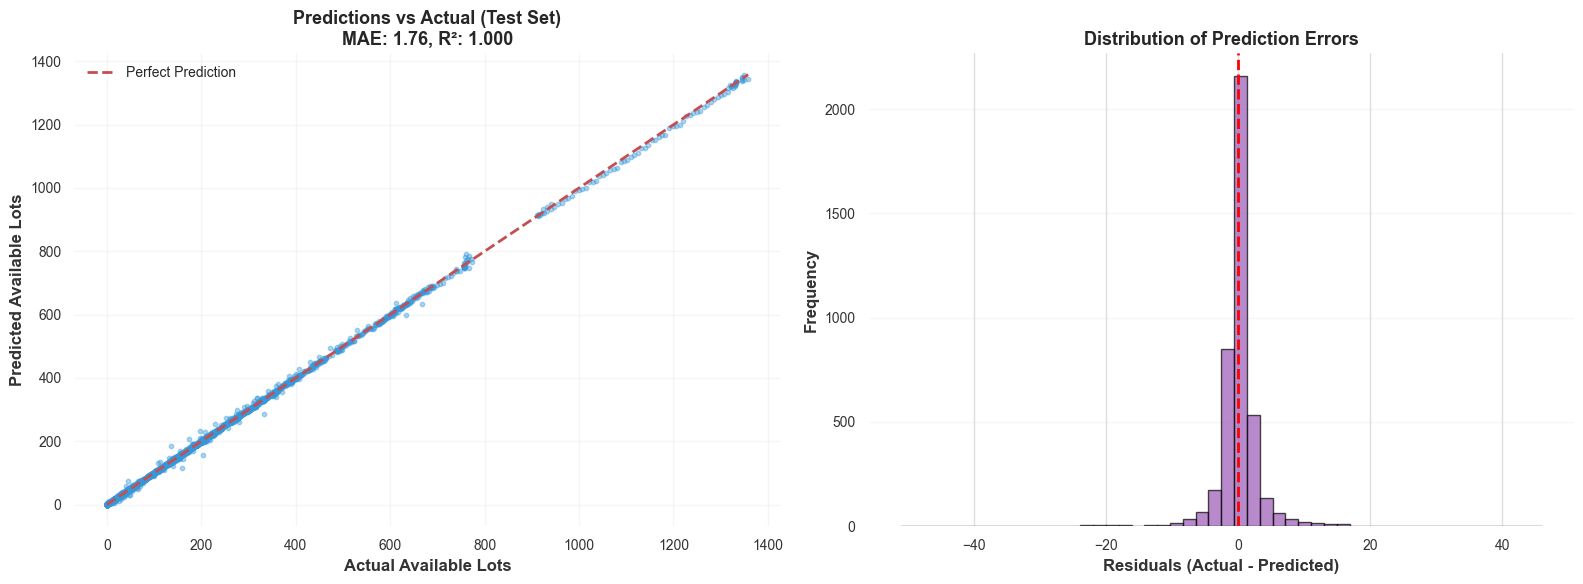


Residual Statistics:
• Mean error: 0.12 lots
• Std dev: 3.62 lots


In [69]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(y_test, y_test_pred, alpha=0.4, s=10, color='#3498DB')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Available Lots', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Available Lots', fontsize=12, fontweight='bold')
axes[0].set_title(f'Predictions vs Actual (Test Set)\nMAE: {test_mae:.2f}, R²: {test_r2:.3f}', 
                 fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Residuals histogram
residuals = y_test - y_test_pred
axes[1].hist(residuals, bins=50, color='#9B59B6', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Prediction Errors', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nResidual Statistics:")
print(f"• Mean error: {residuals.mean():.2f} lots")
print(f"• Std dev: {residuals.std():.2f} lots")

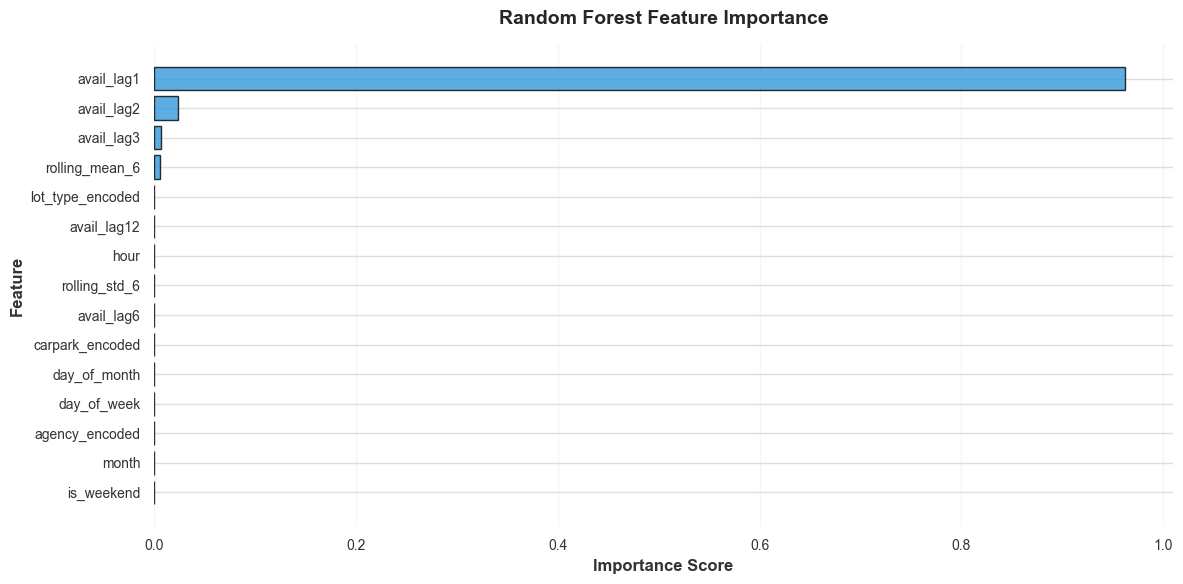


Top 5 Most Important Features:
         feature  importance
      avail_lag1    0.961521
      avail_lag2    0.024409
      avail_lag3    0.007417
  rolling_mean_6    0.006386
lot_type_encoded    0.000075

Key Insights:
• Lag features (past availability) are typically most important
• Time features (hour, day) capture daily/weekly patterns
• Rolling statistics help capture recent trends


In [70]:
# Feature importance analysis
importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='#3498DB', alpha=0.8, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(importance_df.head().to_string(index=False))
print("\nKey Insights:")
print("• Lag features (past availability) are typically most important")
print("• Time features (hour, day) capture daily/weekly patterns")
print("• Rolling statistics help capture recent trends")

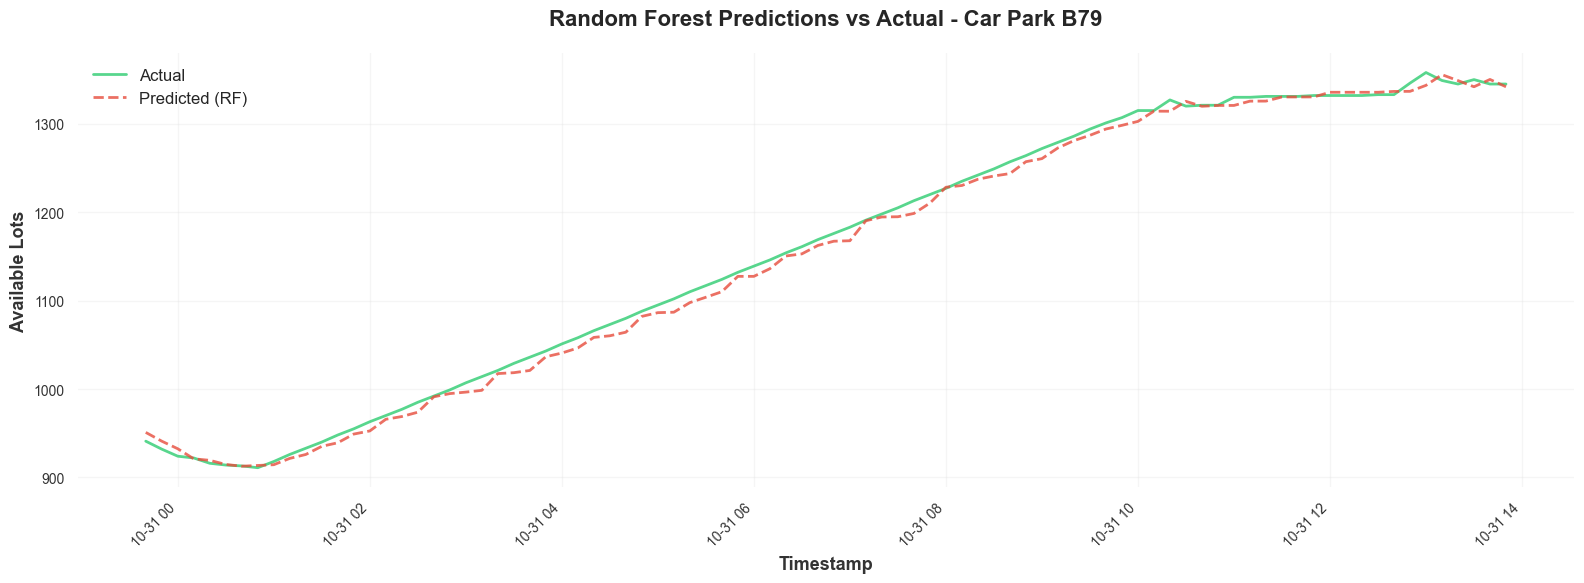


Performance for Car Park B79:
• MAE: 7.10 lots
• R²: 0.9970


In [71]:
# Time series visualization - compare predictions with actual over time
# Select a specific carpark for detailed visualization
test_carpark_id = 'B79'  # Change this to analyze different carparks

# Get test data for this specific carpark
test_df = df_rf.iloc[split_idx:].copy()
test_df['predictions'] = y_test_pred

# Filter for specific carpark
carpark_test = test_df[test_df['carpark_id'] == test_carpark_id].copy()

if len(carpark_test) > 0:
    plt.figure(figsize=(16, 6))
    
    # Plot actual vs predicted
    plt.plot(carpark_test['timestamp'], carpark_test['available_lots'], 
             label='Actual', color='#2ECC71', linewidth=2, alpha=0.8)
    plt.plot(carpark_test['timestamp'], carpark_test['predictions'], 
             label='Predicted (RF)', color='#E74C3C', linewidth=2, linestyle='--', alpha=0.8)
    
    plt.title(f'Random Forest Predictions vs Actual - Car Park {test_carpark_id}', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
    plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
    plt.legend(fontsize=12, loc='best')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Calculate metrics for this specific carpark
    carpark_mae = mean_absolute_error(carpark_test['available_lots'], carpark_test['predictions'])
    carpark_r2 = r2_score(carpark_test['available_lots'], carpark_test['predictions'])
    
    print(f"\nPerformance for Car Park {test_carpark_id}:")
    print(f"• MAE: {carpark_mae:.2f} lots")
    print(f"• R²: {carpark_r2:.4f}")
else:
    print(f"Car Park {test_carpark_id} not found in test set. Try a different carpark_id.")

In [72]:
# Performance by carpark - identify best and worst predictions
carpark_performance = []

for carpark in test_df['carpark_id'].unique():
    carpark_data = test_df[test_df['carpark_id'] == carpark]
    if len(carpark_data) > 10:  # Only include carparks with sufficient test data
        mae = mean_absolute_error(carpark_data['available_lots'], carpark_data['predictions'])
        r2 = r2_score(carpark_data['available_lots'], carpark_data['predictions'])
        
        carpark_performance.append({
            'carpark_id': carpark,
            'development': carpark_data['development'].iloc[0],
            'test_samples': len(carpark_data),
            'mae': mae,
            'r2': r2
        })

performance_df = pd.DataFrame(carpark_performance).sort_values('mae')

print("=" * 80)
print("TOP 5 BEST PREDICTED CAR PARKS (Lowest MAE)")
print("=" * 80)
print(performance_df[['carpark_id', 'development', 'mae', 'r2']].head().to_string(index=False))

print("\n" + "=" * 80)
print("TOP 5 WORST PREDICTED CAR PARKS (Highest MAE)")
print("=" * 80)
print(performance_df[['carpark_id', 'development', 'mae', 'r2']].tail().to_string(index=False))

print(f"\nAverage MAE across all carparks: {performance_df['mae'].mean():.2f} lots")
print(f"Average R² across all carparks: {performance_df['r2'].mean():.4f}")

TOP 5 BEST PREDICTED CAR PARKS (Lowest MAE)
carpark_id                          development      mae       r2
       B14     BLK 412/413 BEDOK NORTH AVENUE 2 0.004450 0.000000
     P0109 PASIR RIS PARK CAR PARK E OFF STREET 0.004668 0.999996
       B7A     BLK 216/218 BEDOK NORTH STREET 1 0.006516 0.000000
       B41         BLK 510 BEDOK NORTH STREET 3 0.681482 0.795709
       B32     BLK 130/132 BEDOK NORTH STREET 2 0.768439 0.995724

TOP 5 WORST PREDICTED CAR PARKS (Highest MAE)
carpark_id                      development      mae       r2
       B28     BLK 107/110 BEDOK NORTH ROAD 3.575207 0.798863
       B11 BLK 416/418 BEDOK NORTH AVENUE 2 4.264717 0.988633
       B44 BLK 528/536 BEDOK NORTH STREET 3 4.692965 0.996688
        63                    Tampines Mall 6.581168 0.995425
       B79    BLK 772A BEDOK RESERVOIR VIEW 7.098327 0.997045

Average MAE across all carparks: 1.80 lots
Average R² across all carparks: 0.9346


#### **24-Hour Future Prediction - Random Forest**

**Iterative Forecasting Process:**
1. Start with recent historical values (last 20 timesteps)
2. For each future timestep:
   - Extract time features (hour, day, etc.)
   - Calculate lag features from recent values
   - Compute rolling statistics
   - Make prediction
   - Add prediction to history for next iteration
3. Repeat for all 144 intervals (24 hours)

**Advantages:**
- Incorporates rich feature set
- More accurate for multi-carpark scenarios
- Provides feature importance insights

**Customization:**
Change `forecast_carpark` variable to predict for any carpark in the dataset.

In [73]:
# Generate future predictions for next 24 hours (144 time steps)
forecast_carpark = 'B79'  # Choose carpark to forecast

# Get the most recent data for this carpark
recent_data = df_rf[df_rf['carpark_id'] == forecast_carpark].tail(20).copy()

if len(recent_data) == 0:
    print(f"Carpark {forecast_carpark} not found!")
else:
    # Get the last timestamp and carpark info
    last_timestamp = recent_data['timestamp'].iloc[-1]
    carpark_encoded = recent_data['carpark_encoded'].iloc[-1]
    agency_encoded = recent_data['agency_encoded'].iloc[-1]
    lot_type_encoded = recent_data['lot_type_encoded'].iloc[-1]
    
    # Generate future timestamps (10-min intervals for 24 hours)
    forecast_steps = 144
    future_timestamps = pd.date_range(
        start=last_timestamp + pd.Timedelta(minutes=10),
        periods=forecast_steps,
        freq='10min'
    )
    
    # Initialize predictions list
    future_predictions = []
    
    # Keep track of recent values for lag features
    recent_values = recent_data['available_lots'].values.tolist()
    
    # Iteratively predict each future time step
    for ts in future_timestamps:
        # Create features for this timestamp
        hour = ts.hour
        day_of_week = ts.dayofweek
        is_weekend = 1 if day_of_week in [5, 6] else 0
        day_of_month = ts.day
        month = ts.month
        
        # Calculate lag features from recent values
        avail_lag1 = recent_values[-1]
        avail_lag2 = recent_values[-2]
        avail_lag3 = recent_values[-3]
        avail_lag6 = recent_values[-6] if len(recent_values) >= 6 else recent_values[0]
        avail_lag12 = recent_values[-12] if len(recent_values) >= 12 else recent_values[0]
        
        # Rolling statistics
        rolling_mean_6 = np.mean(recent_values[-6:])
        rolling_std_6 = np.std(recent_values[-6:]) if len(recent_values) >= 6 else 0
        
        # Create feature vector
        features = np.array([[
            hour, day_of_week, is_weekend, day_of_month, month,
            carpark_encoded, agency_encoded, lot_type_encoded,
            avail_lag1, avail_lag2, avail_lag3, avail_lag6, avail_lag12,
            rolling_mean_6, rolling_std_6
        ]])
        
        # Make prediction
        pred = rf_model.predict(features)[0]
        
        # Ensure prediction is non-negative
        pred = max(0, pred)
        
        future_predictions.append(pred)
        
        # Update recent values with new prediction
        recent_values.append(pred)
        if len(recent_values) > 20:
            recent_values.pop(0)
    
    print(f"Generated {len(future_predictions)} future predictions for Car Park {forecast_carpark}")
    print(f"Forecast period: {future_timestamps[0]} to {future_timestamps[-1]}")
    print(f"Predicted range: {min(future_predictions):.1f} to {max(future_predictions):.1f} lots")

Generated 144 future predictions for Car Park B79
Forecast period: 2025-10-31 14:00:00 to 2025-11-01 13:50:00
Predicted range: 1336.4 to 1339.9 lots


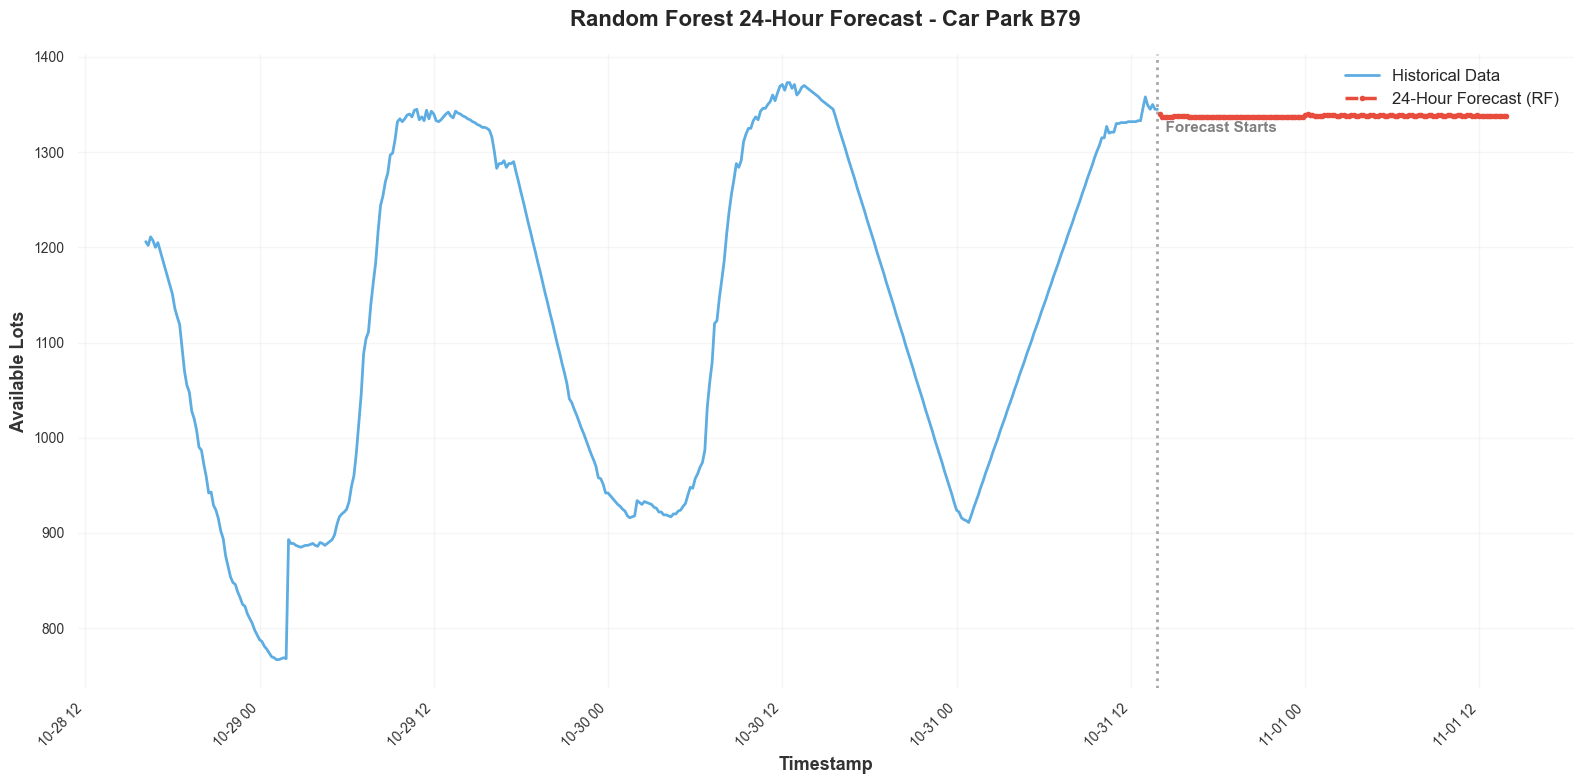

In [74]:
# Visualize future forecast
plt.figure(figsize=(16, 8))

# Get recent historical data for context
historical_data = resampled_df[resampled_df['carpark_id'] == forecast_carpark].tail(1000)

plt.plot(historical_data['timestamp'], historical_data['available_lots'], 
         label='Historical Data', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(future_timestamps, future_predictions, 
         label='24-Hour Forecast (RF)', color='#E74C3C', linewidth=2.5, linestyle='--', marker='o', markersize=3)

# Add vertical line at forecast start
plt.axvline(x=last_timestamp, color='gray', linestyle=':', linewidth=2, alpha=0.7)
plt.text(last_timestamp, plt.ylim()[1] * 0.95, '  Forecast Starts', 
         rotation=0, verticalalignment='top', fontsize=11, color='gray', fontweight='bold')

plt.title(f'Random Forest 24-Hour Forecast - Car Park {forecast_carpark}', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

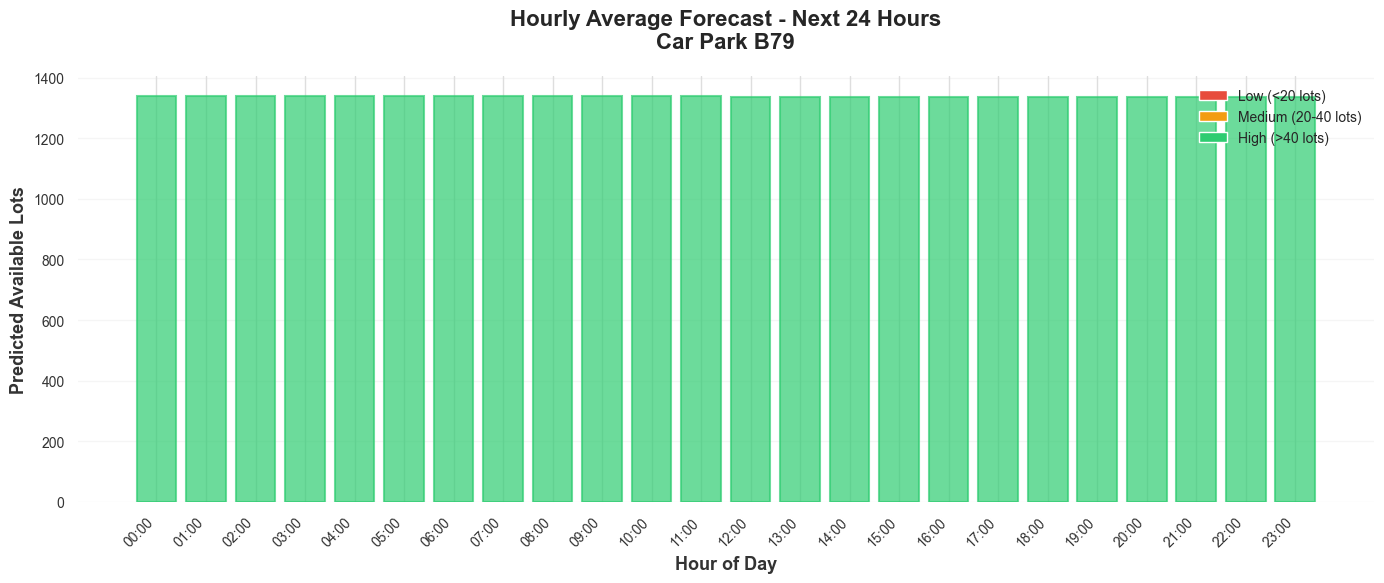


24-HOUR FORECAST INSIGHTS (Random Forest)
Minimum availability: 1336.4 lots at 2025-10-31 14:20:00
Maximum availability: 1339.9 lots at 2025-10-31 14:00:00
Average availability: 1338.0 lots

✓ Best times to find parking (above average):
  • 14:00 - ~1340 lots available
  • 00:00 - ~1339 lots available
  • 00:10 - ~1340 lots available
  • 00:20 - ~1339 lots available
  • 00:30 - ~1339 lots available


In [75]:
# Hourly forecast summary
forecast_df = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_available_lots': future_predictions
})

forecast_df['hour'] = forecast_df['timestamp'].dt.hour
hourly_forecast = forecast_df.groupby('hour')['predicted_available_lots'].mean().reset_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(hourly_forecast['hour'], hourly_forecast['predicted_available_lots'], 
        color='#3498DB', alpha=0.7, edgecolor='black', linewidth=1.5)

# Color bars by availability level
for i, bar in enumerate(bars):
    if hourly_forecast['predicted_available_lots'].iloc[i] < 20:
        bar.set_color('#E74C3C')  # Red for low availability
    elif hourly_forecast['predicted_available_lots'].iloc[i] < 40:
        bar.set_color('#F39C12')  # Orange for medium
    else:
        bar.set_color('#2ECC71')  # Green for high

plt.title(f'Hourly Average Forecast - Next 24 Hours\nCar Park {forecast_carpark}', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Available Lots', fontsize=13, fontweight='bold')
plt.xticks(hourly_forecast['hour'], [f'{h:02d}:00' for h in hourly_forecast['hour']], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#E74C3C', label='Low (<20 lots)'),
    Patch(facecolor='#F39C12', label='Medium (20-40 lots)'),
    Patch(facecolor='#2ECC71', label='High (>40 lots)')
]
plt.legend(handles=legend_elements, loc='best', fontsize=10)

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "=" * 70)
print("24-HOUR FORECAST INSIGHTS (Random Forest)")
print("=" * 70)
min_idx = np.argmin(future_predictions)
max_idx = np.argmax(future_predictions)
print(f"Minimum availability: {future_predictions[min_idx]:.1f} lots at {future_timestamps[min_idx]}")
print(f"Maximum availability: {future_predictions[max_idx]:.1f} lots at {future_timestamps[max_idx]}")
print(f"Average availability: {np.mean(future_predictions):.1f} lots")
print("=" * 70)

# Best times to visit
good_times = [i for i, pred in enumerate(future_predictions) if pred > np.mean(future_predictions)]
if good_times:
    print(f"\n✓ Best times to find parking (above average):")
    for i in good_times[:5]:  # Show first 5
        print(f"  • {future_timestamps[i].strftime('%H:%M')} - ~{future_predictions[i]:.0f} lots available")

---

## **F. Conclusions**

Based on the prediction graph, we felt that LSTM gave the best result. 